<a href="https://colab.research.google.com/github/Hercules2310/Airline-Referral-Prediction/blob/main/Airline_Referral_2.0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Airline Passenger Referral Prediction



# **Project Type**    - Classification
#  **BY**    - PRINCE


# **Project Summary -**

The project aims to predict whether an existing customer will recommend the ailines based on the services provided such as seat comfort, cabin service, travel class,food beverage , entertainment service, etc. The prediction model is developed using classification techniques in machine learning.The use of machine learning techniques allows for the development of a model that can learn from historical passenger and booking data and make accurate predictions on new data. The model can be used by airlines to target marketing campaigns towards existing passengers who are likely to recommend the flights based on their experience with airlines.

# **Problem Statement**


#  The main objective is to predict whether existing passengers will refer the airline to their friends and family based on their experience.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/Hercules2310/Airline-Referral-Prediction

# **Import Libraries** : -

In [1]:
# pd.set_option('display.max_rows', None)  # Show all rows
# pd.set_option('display.max_columns', None)  # Show all columns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [4]:
from itertools import chain

In [5]:
import re
import contractions
import string
import nltk
from textblob import TextBlob
from nltk import tokenize
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
import lightgbm as lgb

In [10]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
from sklearn.metrics import make_scorer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [57]:
import statsmodels.api as sm

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

In [13]:
# Classification Metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score,  roc_auc_score
from sklearn.metrics import classification_report

In [14]:
def plot_confusion_matrix(y, y_pred, normalize_str, figsize_w, figsize_h):
    """
    Plot the confusion matrix of a classifier.
    """
    plt.figure(figsize=(figsize_w,figsize_h))
    plt.title('Confusion matrix')
    cm = confusion_matrix(y, y_pred, normalize=normalize_str)
    df_cm = pd.DataFrame(cm, columns=np.unique(y), index = np.unique(y))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    sns.set(font_scale=1.4)
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})
    plt.show()
    return

In [15]:
def plot_roc_curve(fpr, tpr, clf_name, figsize_w, figsize_h):
    """
    Plot the ROC curve of a classifier.
    """
    plt.figure(figsize=(figsize_w,figsize_h))
    sns.set(style="whitegrid")
    plt.plot([0, 1], [0, 1], 'k--', label='random')
    plt.plot(fpr, tpr, label=clf_name)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return

In [16]:
sns.set()

# ***Let's Begin !***

## ***1. Know Your Data***

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_excel('https://github.com/Hercules2310/Airline-Referral-Prediction/raw/f28ccf2481e8e9c9695546e1069d696dbbf87eb0/data_airline_reviews.xlsx')

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
2               NaN      NaN                  NaN           NaN   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   
4               NaN      NaN                  NaN           NaN   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
2                                                NaN      NaN             NaN   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   
4                                                NaN      NaN             NaN   

           cabin                         route           date_flown  \
0            NaN                           NaN                  NaN   
1  Economy Class  London to Izmir via Istanbul  2019-05-01 00:00:00   
2            NaN                           NaN                  NaN   
3  Economy Class         Istanbul to Bucharest  2019-05-01 00:00:00   
4            NaN                           NaN                  NaN   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
2           NaN            NaN       NaN            NaN             NaN   
3           4.0            1.0       1.0            1.0             1.0   
4           NaN            NaN       NaN            NaN             NaN   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
2              NaN         NaN  
3              1.0          no  
4              NaN         NaN

In [ ]:
df.tail()

airline  overall             author         review_date  \
131890  Ukraine International      NaN   Andriy Yesypenko       19th May 2006   
131891                    NaN      NaN                NaN                 NaN   
131892  Ukraine International      NaN  Volodya Bilotkach     29th April 2006   
131893                    NaN      NaN                NaN                 NaN   
131894  Ukraine International      NaN    Kasper Hettinga  10th February 2006   

                                          customer_review aircraft  \
131890  Kiev - London (Gatwick) in business class (in ...      NaN   
131891                                                NaN      NaN   
131892  Several flights - KBP to AMS (3 times one way)...      NaN   
131893                                                NaN      NaN   
131894  KBP-AMS with UIA. Although it was a relatively...      NaN   

       traveller_type cabin route date_flown  seat_comfort  cabin_service  \
131890            NaN   NaN   NaN        NaN           NaN            NaN   
131891            NaN   NaN   NaN        NaN           NaN            NaN   
131892            NaN   NaN   NaN        NaN           NaN            NaN   
131893            NaN   NaN   NaN        NaN           NaN            NaN   
131894            NaN   NaN   NaN        NaN           NaN            NaN   

        food_bev  entertainment  ground_service  value_for_money recommended  
131890       NaN            NaN             NaN              NaN          no  
131891       NaN            NaN             NaN              NaN         NaN  
131892       NaN            NaN             NaN              NaN          no  
131893       NaN            NaN             NaN              NaN         NaN  
131894       NaN            NaN             NaN              NaN          no

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(131895, 17)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

70711

In [ ]:
df=df.drop_duplicates()
# Duplicates many a times cause data leakage
# Duplicates can also induce bias in data
# dropping them is necessary

In [ ]:
df.head(3)

airline  overall               author   review_date  \
0               NaN      NaN                  NaN           NaN   
1  Turkish Airlines      7.0  Christopher Hackley  8th May 2019   
3  Turkish Airlines      2.0        Adriana Pisoi  7th May 2019   

                                     customer_review aircraft  traveller_type  \
0                                                NaN      NaN             NaN   
1  âœ… Trip Verified | London to Izmir via Istanb...      NaN        Business   
3  âœ… Trip Verified | Istanbul to Bucharest. We ...      NaN  Family Leisure   

           cabin                         route           date_flown  \
0            NaN                           NaN                  NaN   
1  Economy Class  London to Izmir via Istanbul  2019-05-01 00:00:00   
3  Economy Class         Istanbul to Bucharest  2019-05-01 00:00:00   

   seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0           NaN            NaN       NaN            NaN             NaN   
1           4.0            5.0       4.0            4.0             2.0   
3           4.0            1.0       1.0            1.0             1.0   

   value_for_money recommended  
0              NaN         NaN  
1              4.0         yes  
3              1.0          no

In [ ]:
df=df.drop(0,axis=0) # dropping the original all NaN row

In [ ]:
df[df['customer_review'].duplicated()].shape

(11, 17)

In [ ]:
df=df[~(df['customer_review'].duplicated())]   # removing the text duplicated rows to work on text data

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
df.shape

(61172, 17)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum().sum()

188970

In [ ]:
# column wise missing count
df.isna().sum()

airline                0
overall             1781
author                 0
review_date            0
customer_review        0
aircraft           42686
traveller_type     23636
cabin               2477
route              23663
date_flown         23742
seat_comfort        4970
cabin_service       4941
food_bev           12840
entertainment      20950
ground_service     24007
value_for_money     1855
recommended         1422
dtype: int64

In [ ]:
# Visualizing the missing values

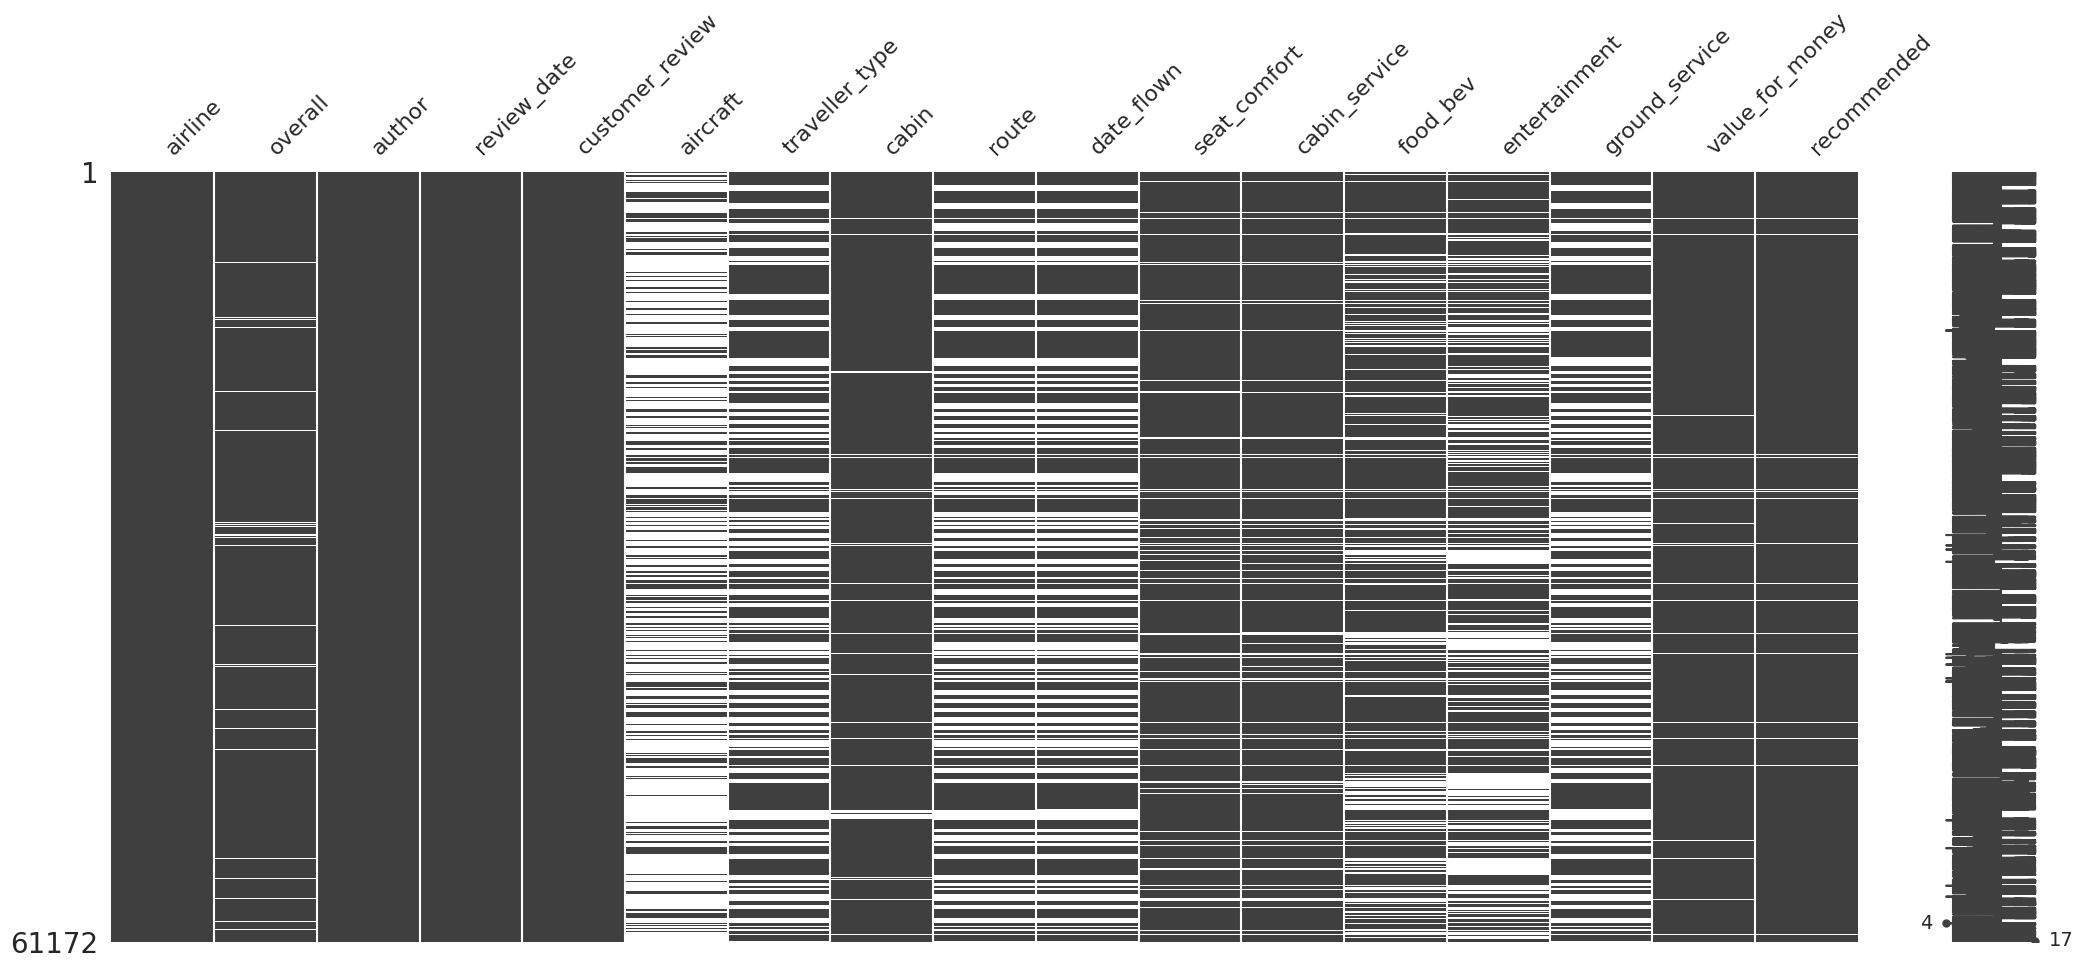

In [ ]:
# Matrix Plot
msno.matrix(df)
plt.show()


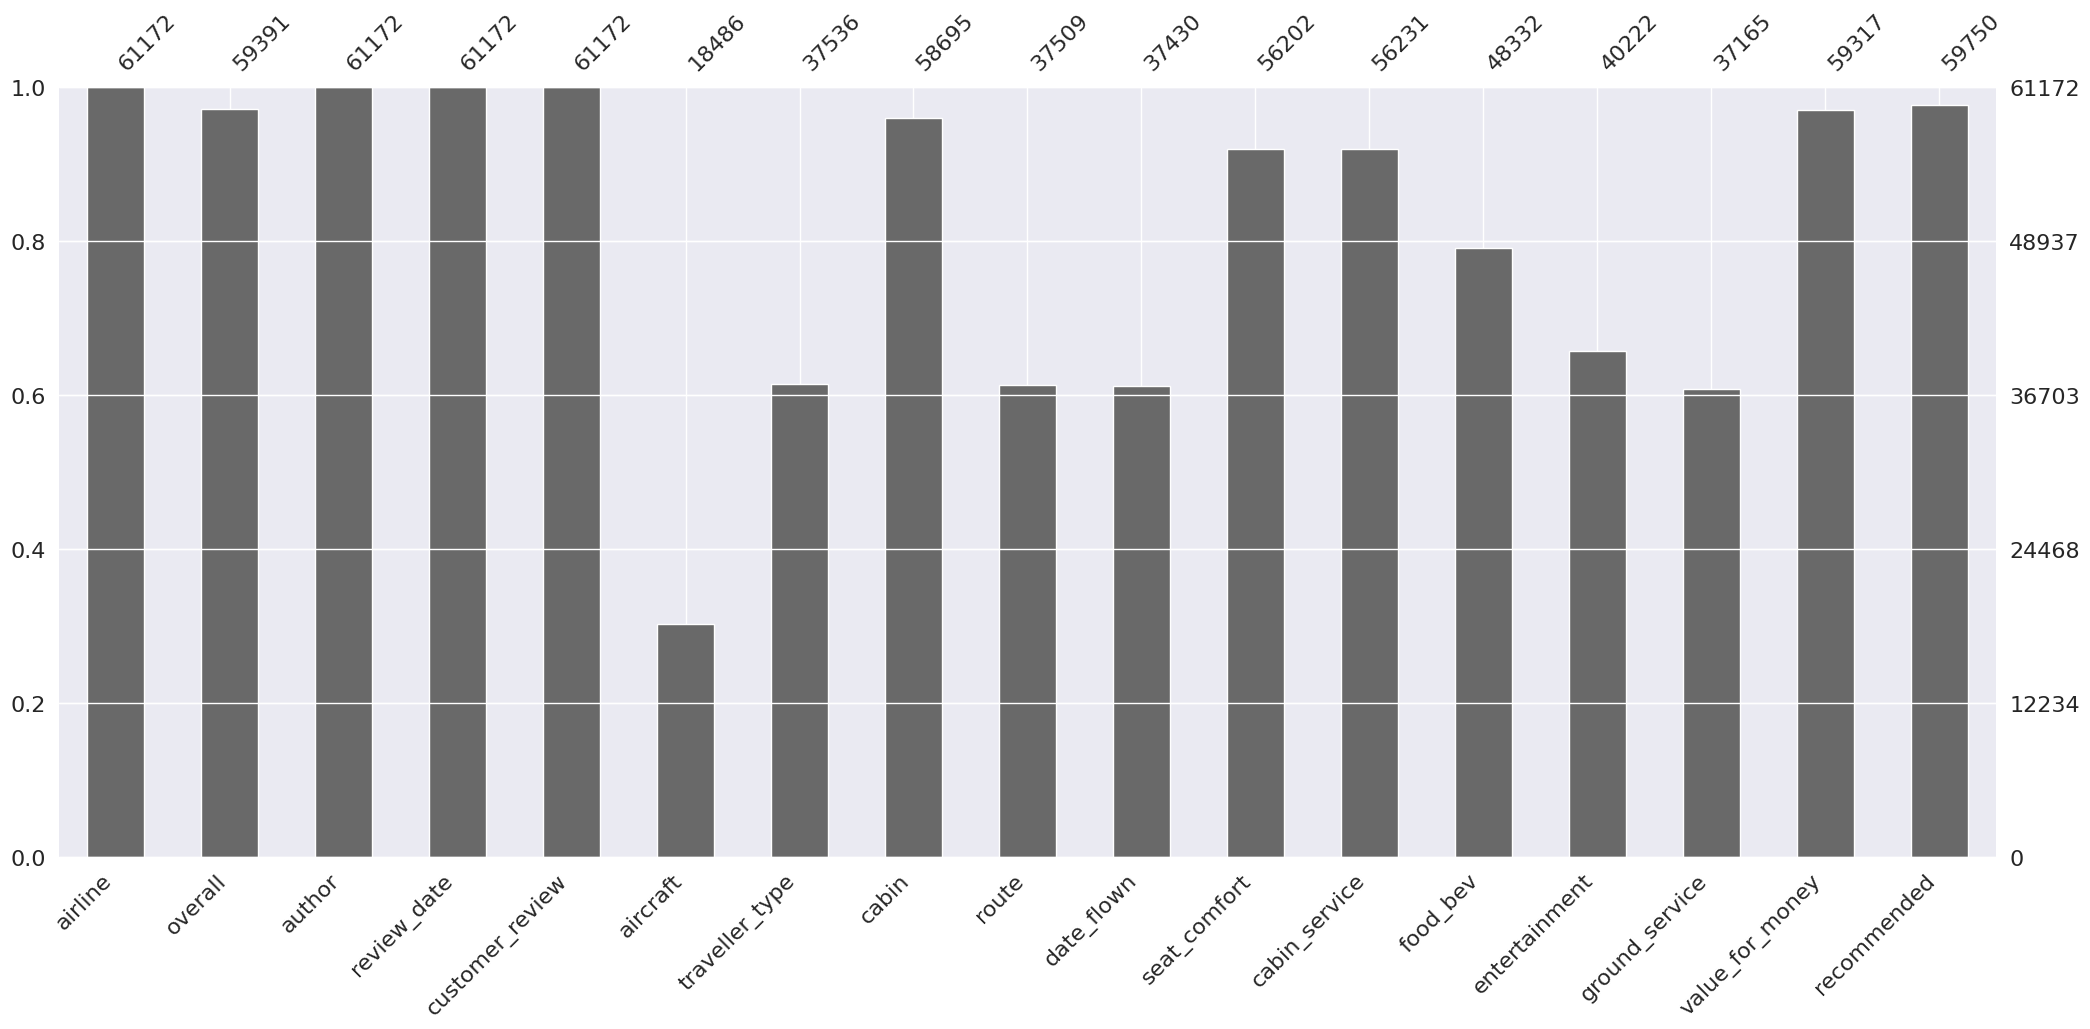

In [ ]:
# Bar Plot
msno.bar(df)
plt.show()

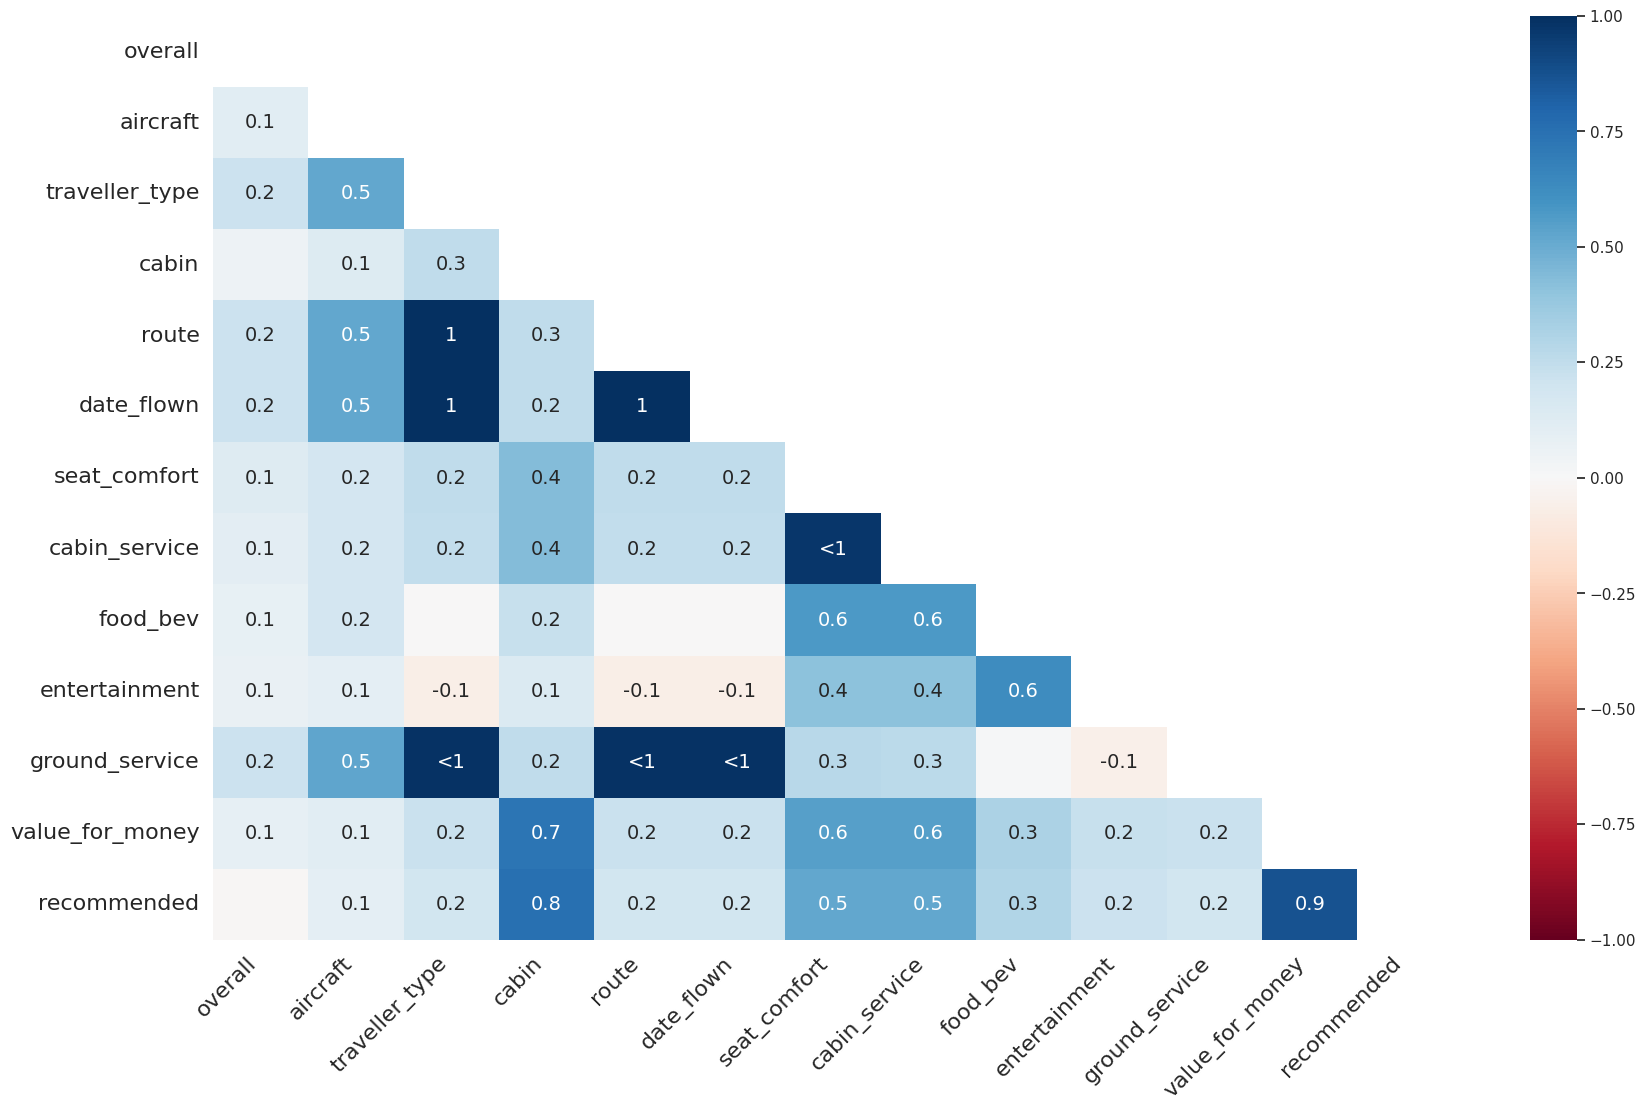

In [ ]:
# Heatmap
msno.heatmap(df)
plt.show()

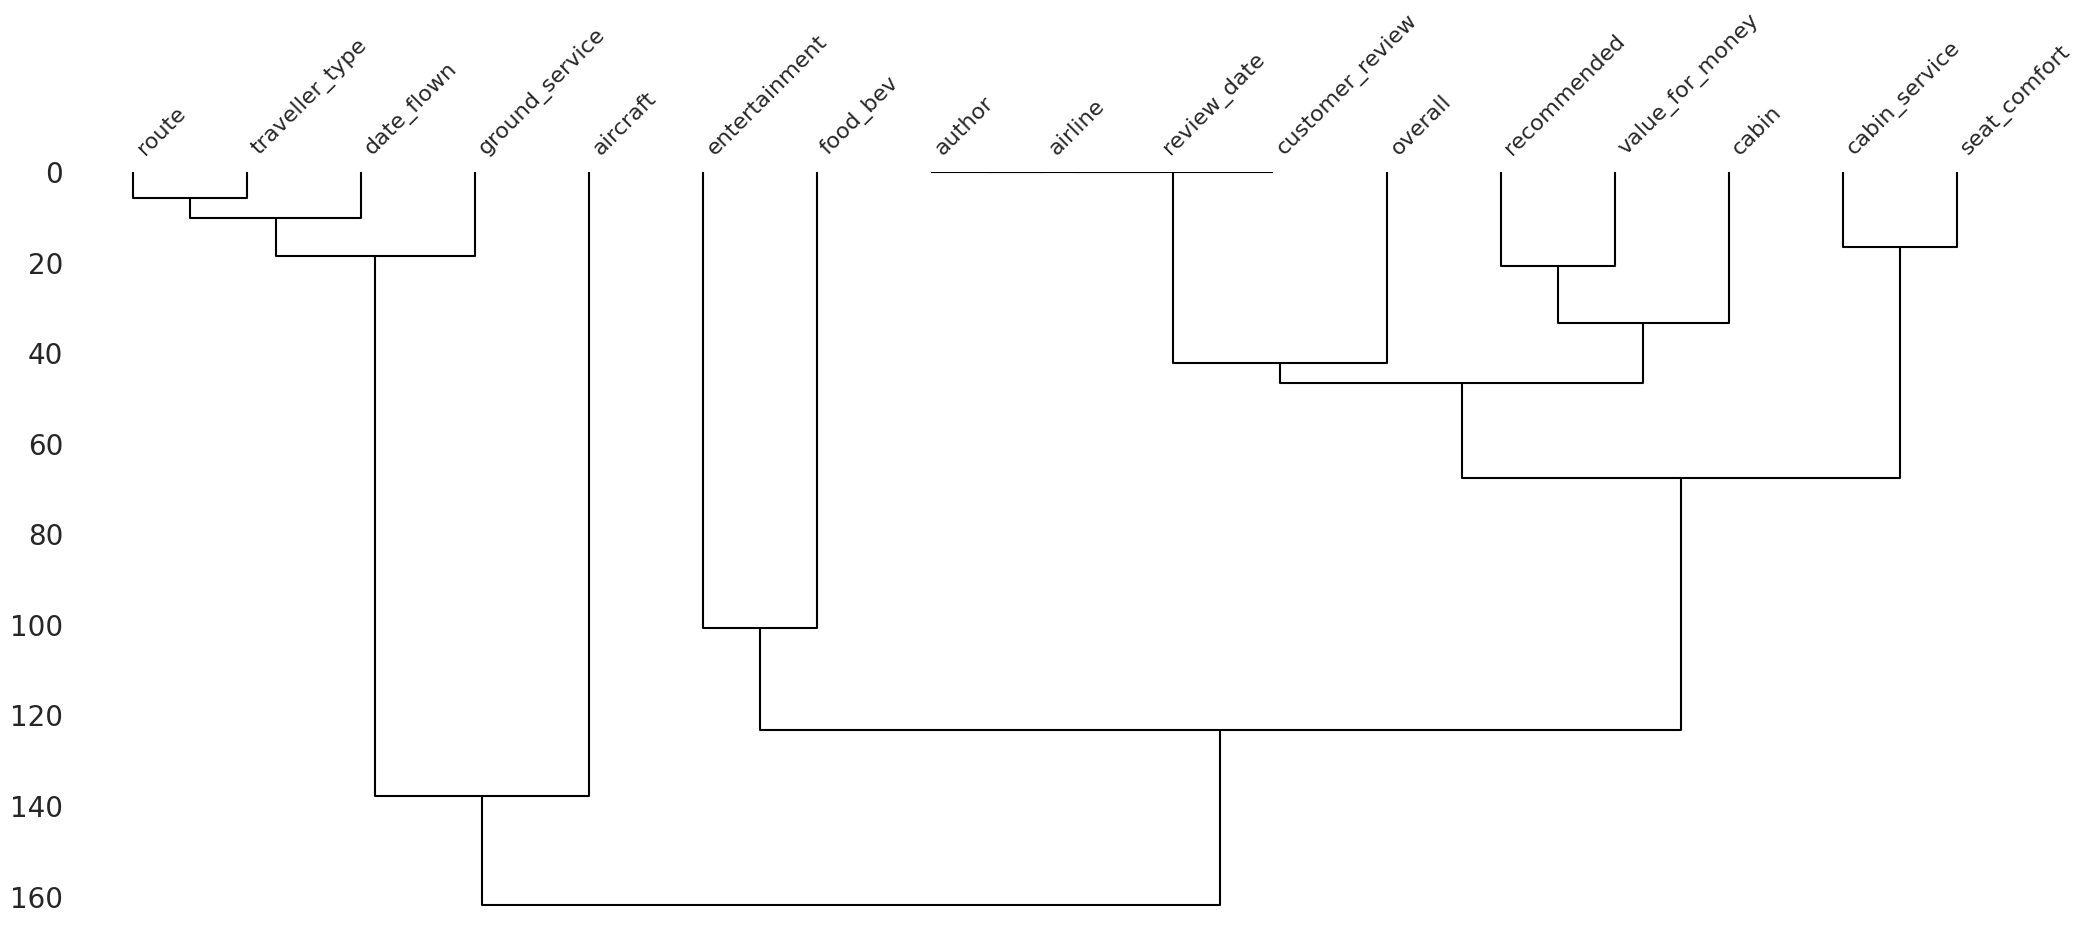

In [ ]:
# Dendrogram
msno.dendrogram(df)
plt.show()

In [ ]:
# Missing Data Count
missing_count = df.isnull().sum()
print(missing_count)

airline                0
overall             1781
author                 0
review_date            0
customer_review        0
aircraft           42686
traveller_type     23636
cabin               2477
route              23663
date_flown         23742
seat_comfort        4970
cabin_service       4941
food_bev           12840
entertainment      20950
ground_service     24007
value_for_money     1855
recommended         1422
dtype: int64


### What did you know about your dataset?



*   There are 131895 total observation with 17 different features.
*   Most of the Feature like aircraft,author and airline has null values.
*   There were lot of duplicates around 70711 duplicate data.
*   The total no. of missing data is 188970



## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe()

overall  seat_comfort  cabin_service      food_bev  entertainment  \
count  59391.000000  56202.000000   56231.000000  48332.000000   40222.000000   
mean       5.164503      2.959130       3.200139      2.926881       2.887947   
std        3.483680      1.436454       1.568472      1.483166       1.504491   
min        1.000000      1.000000       1.000000      1.000000       1.000000   
25%        1.000000      2.000000       2.000000      1.000000       1.000000   
50%        5.000000      3.000000       3.000000      3.000000       3.000000   
75%        9.000000      4.000000       5.000000      4.000000       4.000000   
max       10.000000      5.000000       5.000000      5.000000       5.000000   

       ground_service  value_for_money  
count    37165.000000     59317.000000  
mean         2.681340         2.950722  
std          1.614042         1.588452  
min          1.000000         1.000000  
25%          1.000000         1.000000  
50%          3.000000         3.000000  
75%          4.000000         4.000000  
max          5.000000         5.000000

### Variables Description



1.	Name of the airline: airline → String (Categorical)
2.	Overall points are given to the trip: overall → Integer (Categorical)
3.	Author of the trip: author → String (Categorical)
4.	Date of the Review: reviewdate → DateTime
5.	Customer of the aircraft: aircraft → String (Categorical)
6.	Type of traveler (e.g. business, leisure): travellertype → String (Categorical)
7.	Cabin at the flight: cabin → String (Categorical):
8.	Date flown: date → DateTime
9.	Service rated between 1-5: service → Integer (Categorical)
10.	Food and beverage rated between 1-5: foodbev → Integer (Categorical)
11.	Ground service rated between 1-5: groundservice → Integer (Categorical)
12.	Value for money rated between 1-5: valueformoney → Integer (Categorical)
13.	Recommended (Binary, target variable): recommended → Integer (Binary, 0 or 1)


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
unique_values_with_freq = {}

for col in df.columns:
    # Get unique values and their frequencies
    value_counts = df[col].value_counts(dropna=False)  # dropna=False to include NaN counts
    unique_values_with_freq[col] = value_counts

# Print unique values and their frequencies for each column
for col, value_counts in unique_values_with_freq.items():
    print(f"Column: {col}")
    print("Unique Values and Frequencies:")
    print(value_counts)
    print()

Column: airline
Unique Values and Frequencies:
airline
Spirit Airlines       2870
American Airlines     2846
United Airlines       2774
British Airways       2729
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                70
Thai Smile Airways      48
Name: count, Length: 81, dtype: int64

Column: overall
Unique Values and Frequencies:
overall
1.0     16102
10.0     8023
9.0      7360
8.0      6703
2.0      5491
7.0      4215
3.0      3740
5.0      2924
6.0      2435
4.0      2398
NaN      1781
Name: count, dtype: int64

Column: author
Unique Values and Frequencies:
author
Anders Pedersen    93
Michel Perrin      89
Jonathan Rodden    81
T Eldem            56
John Curtain       52
                   ..
S Hofmann           1
A Robbins           1
P Devans            1
T Dayes             1
Kasper Hettinga     1
Name: count, Length: 44065, dtype: int64

Column: review_date
Unique Values an

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Rectify the data types
print(df.dtypes)

airline             object
overall            float64
author              object
review_date         object
customer_review     object
aircraft            object
traveller_type      object
cabin               object
route               object
date_flown          object
seat_comfort       float64
cabin_service      float64
food_bev           float64
entertainment      float64
ground_service     float64
value_for_money    float64
recommended         object
dtype: object


In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
df['airline'].value_counts()

airline
Spirit Airlines       2870
American Airlines     2846
United Airlines       2774
British Airways       2729
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                70
Thai Smile Airways      48
Name: count, Length: 81, dtype: int64

In [ ]:
airlines = list(map(lambda x : x.lower().split(),df['airline'].values.tolist()))
airlines_values = list(set(chain.from_iterable(airlines)))

In [ ]:
len(airlines_values)

103

In [ ]:
df['review_date']

0              8th May 2019
1              7th May 2019
2              7th May 2019
3              6th May 2019
4              6th May 2019
                ...        
61167     21st January 2007
61168    15th December 2006
61169         19th May 2006
61170       29th April 2006
61171    10th February 2006
Name: review_date, Length: 61172, dtype: object

In [ ]:
def clean_date(date_str):
  return re.sub(r'(\d+)(st|nd|rd|th)', r'\1', date_str)
df['review_date']=df['review_date'].apply(clean_date)

In [ ]:
df['review_date']=pd.to_datetime(df['review_date'],format='%d %B %Y')

In [ ]:
date_flown_day_date=pd.to_datetime(df['date_flown'],format='%d %B %Y',errors='coerce')
date_flown_day_date.dt.month.value_counts()

date_flown
5.0    2638
Name: count, dtype: int64

** Zero Variance of date_flown day,  date_flown only has granularity till month level**

In [ ]:
df['date_flown']=pd.to_datetime(df['date_flown'],format='%B %Y',errors='coerce')

In [ ]:
df['route']

0          London to Izmir via Istanbul
1                 Istanbul to Bucharest
2        Rome to Prishtina via Istanbul
3          Washington Dulles to Karachi
4         Mumbai to Dublin via Istanbul
                      ...              
61167                               NaN
61168                               NaN
61169                               NaN
61170                               NaN
61171                               NaN
Name: route, Length: 61172, dtype: object

In [ ]:
df.columns.get_loc('route')

8

**Feature engineering on route column**

In [ ]:
departure=df['route'].str.split(r'\s(to)\s').apply(lambda x: x[0] if type(x)==list else x)
df.insert(loc=9, column='departure', value=departure, allow_duplicates=False)

In [ ]:
arrival=df['route'].str.split(r'\s(to)\s').apply(lambda x: x[-1] if type(x)==list else x).str.split(r'\s(via)\s').apply(lambda x: x[0] if type(x)==list else x)
df.insert(loc=10, column='arrival', value=arrival, allow_duplicates=False)

In [ ]:
layover=df['route'].apply(lambda x: 1 if type(x)==str and 'via' in x else 0 if type(x)==str else x)
df.insert(loc=11, column='layover', value=layover, allow_duplicates=False)

In [ ]:
df[['route','departure','arrival','layover']]

route          departure    arrival  layover
0        London to Izmir via Istanbul             London      Izmir      1.0
1               Istanbul to Bucharest           Istanbul  Bucharest      0.0
2      Rome to Prishtina via Istanbul               Rome  Prishtina      1.0
3        Washington Dulles to Karachi  Washington Dulles    Karachi      0.0
4       Mumbai to Dublin via Istanbul             Mumbai     Dublin      1.0
...                               ...                ...        ...      ...
61167                             NaN                NaN        NaN      NaN
61168                             NaN                NaN        NaN      NaN
61169                             NaN                NaN        NaN      NaN
61170                             NaN                NaN        NaN      NaN
61171                             NaN                NaN        NaN      NaN

[61172 rows x 4 columns]

In [ ]:
df['cabin'].value_counts()

cabin
Economy Class      45163
Business Class      9589
Premium Economy     2411
First Class         1532
Name: count, dtype: int64

In [ ]:
df['customer_review']

0        âœ… Trip Verified | London to Izmir via Istanb...
1        âœ… Trip Verified | Istanbul to Bucharest. We ...
2        âœ… Trip Verified | Rome to Prishtina via Ista...
3        âœ… Trip Verified | Flew on Turkish Airlines I...
4        âœ… Trip Verified | Mumbai to Dublin via Istan...
                               ...                        
61167    Two domestic flights between Kiev and Lviv las...
61168    I had a good flight from London to Kiev with U...
61169    Kiev - London (Gatwick) in business class (in ...
61170    Several flights - KBP to AMS (3 times one way)...
61171    KBP-AMS with UIA. Although it was a relatively...
Name: customer_review, Length: 61172, dtype: object

In [ ]:
df['customer_review'].sample(10)

54191    MEL to DPS on 18 Dec. This flight was without ...
15291    I flew from DCA-EWR on Monday April 14. It was...
16277    Flew last month from Athens to Geneva on an A3...
42505    We enjoyed a family trip to Oman, flying SWISS...
45873    RIX-ATH-RIX. Both flights on time good service...
28657    This was the final leg of a set of 4 short hau...
32043    âœ… Trip Verified | Paris CDG to Warsaw. LOT P...
5843     MUC-BRU on A319 and E195 flight from Munich wa...
262      âœ… Trip Verified | Mogadishu to Amsterdam via...
59270    We were scheduled to fly from JFK to Oslo on J...
Name: customer_review, dtype: object

In [ ]:
df['customer_review'][2140]

'Manila to Geneva via Doha with Qatar Airways. I was expecting a favorable experience based on reviews I read online. But what I experienced was way beyond my expectation. It was the most pleasurable economy flight I have ever experienced. The the diversified, polite and helpful cabin crew were exceptional. Even their info video for airline safety prior to take off is innovative and refreshing. The food on board was average but still tolerable at the least. Freebies for the little ones including the food tray is exceptional. I would truly consider booking my future flights with this airline and highly recommend it to those who have not flown with them yet.'

In [ ]:
df['customer_review']=df['customer_review'].apply(lambda x: x.partition('.')[-1])

In [ ]:
df['recommended'].value_counts()

recommended
no     31265
yes    28485
Name: count, dtype: int64

In [ ]:
df['recommended']=df['recommended'].map({'yes':1,'no':0})

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'departure', 'arrival',
       'layover', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

### What all manipulations have you done and insights you found?


*   Dopping duplicate data
*   Rectified the data types of date
*   Creation of columns such as departure, arrival and layover from route
*   Removed basic route info from customer review text column
*   Date flown has granularity of month and has a lot of missing value
*   Route column contains a combination of places , airport, layover (highly ambiguous data)
*   Ratings starts from 1 and not 0



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Recommended Proportions

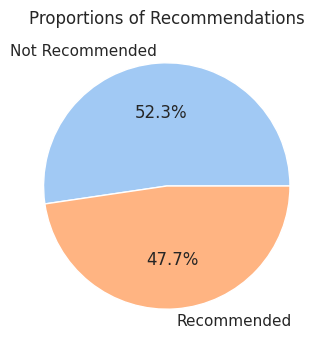

In [ ]:
recommended_counts = df['recommended'].value_counts()

# Create a pie plot
plt.figure(figsize=(4, 4))
plt.pie(recommended_counts, labels=['Not Recommended', 'Recommended'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportions of Recommendations')
plt.show()



*   Pie chart chows proportion of whole. and is useful for understanding the imbalance in data
*   There is minor imbalance in data but that should not affect the model given the data is large enough



#### Overall user experience distribution

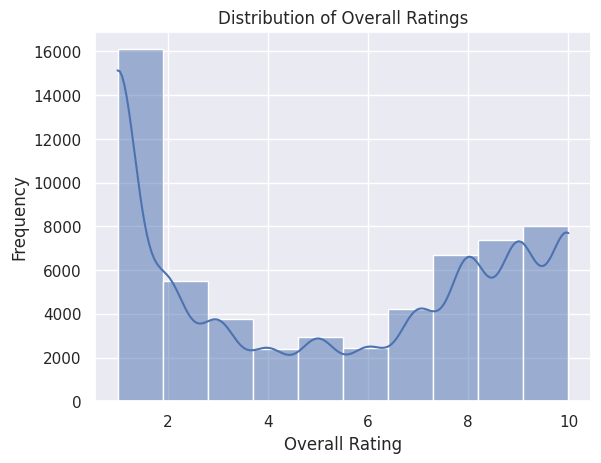

In [ ]:
sns.histplot(df['overall'], bins=10, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()



*   Histogram shows the distribution of data to help us understand the frequency
*   Majority of customers like to give extreme rating as compared to median rating



#### Trends over people flown

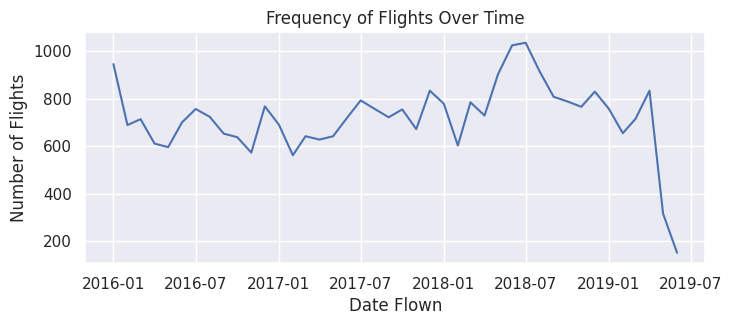

In [ ]:
# Group by date and count the number of flights
date_frequencies = df[df['date_flown'].dt.year>2015]['date_flown'].value_counts().sort_index()

# Plotting the frequency of flights by date
plt.figure(figsize=(8, 3))
sns.lineplot(x=date_frequencies.index, y=date_frequencies.values)
plt.title('Frequency of Flights Over Time')
plt.xlabel('Date Flown')
plt.ylabel('Number of Flights')
plt.xticks()
plt.show()


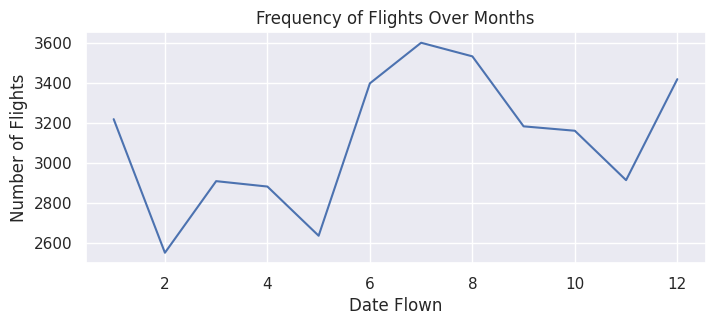

In [ ]:
# Group by date and count the number of flights
date_frequencies = df['date_flown'].dt.month.value_counts().sort_index()

# Plotting the frequency of flights by date
plt.figure(figsize=(8, 3))
sns.lineplot(x=date_frequencies.index, y=date_frequencies.values)
plt.title('Frequency of Flights Over Months')
plt.xlabel('Date Flown')
plt.ylabel('Number of Flights')
plt.xticks()
plt.show()




*   Line chart is used to portray the trends in data over time
*   A sharp dip is observed for people flying after year 2019 possibly due to covid
*   A sasonal pattern over months gives us better marketing campaign timeline, and strategize to improve the revenue opportunities



#### Traveller Type Proportions

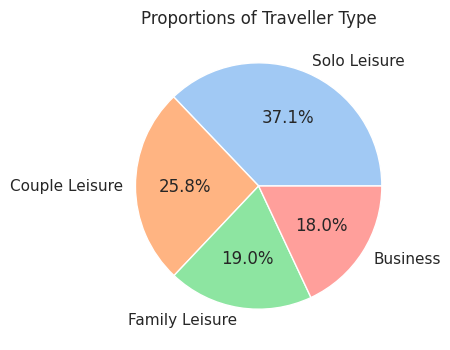

In [ ]:
traveller_type_counts = df['traveller_type'].value_counts()

# Create a pie plot
plt.figure(figsize=(7, 4))
plt.pie(traveller_type_counts, labels=traveller_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportions of Traveller Type')
plt.show()



*   As we can see from above graph,Solo Lesisure has the highest value counts, we can conclude that most people travel solo by airline. Followed by couple and family.



#### Cabin Type Proportions

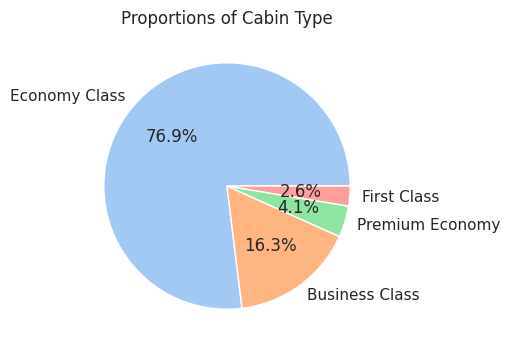

In [ ]:
cabin_counts = df['cabin'].value_counts()

# Create a pie plot
plt.figure(figsize=(4, 4))
plt.pie(cabin_counts, labels=cabin_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Proportions of Cabin Type')
plt.show()



*   As we can see from above graph,Economy Class has the highest value counts, we can conclude that most people travel Economy Class. Followed by Business and Premium.



#### Recommend relation with overall rating

Text(0, 0.5, 'Overall Rating')

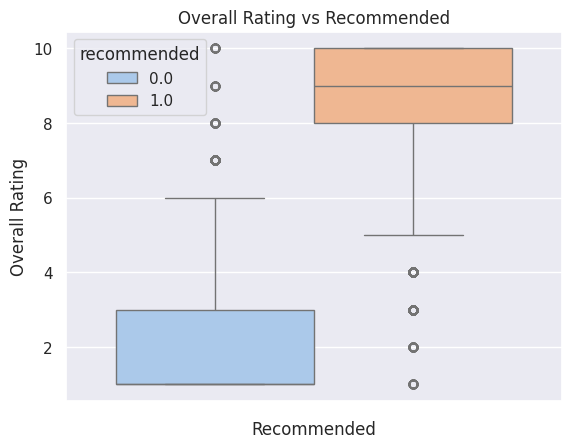

In [ ]:
sns.boxplot(data=df,hue='recommended',y='overall',palette='pastel')
plt.title('Overall Rating vs Recommended')
plt.xlabel('Recommended')
plt.ylabel('Overall Rating')



*   Majority of people have given recommendations in favour of their user experience
*   A small minority of people have acted against their overall rating



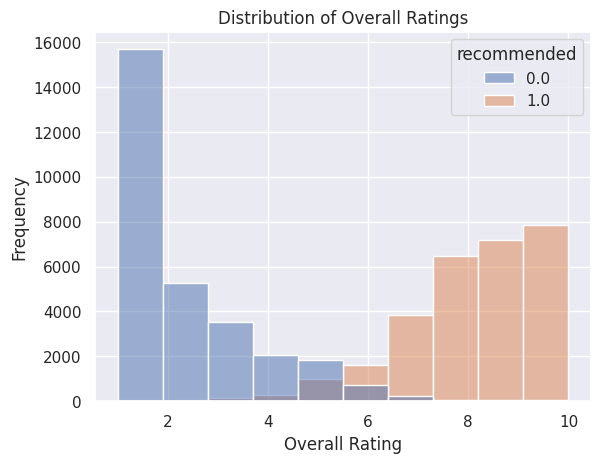

In [ ]:
sns.histplot(data=df,x='overall',hue='recommended', bins=10)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()



*   A highly linear relation between both variables



#### Airline vs User Experience

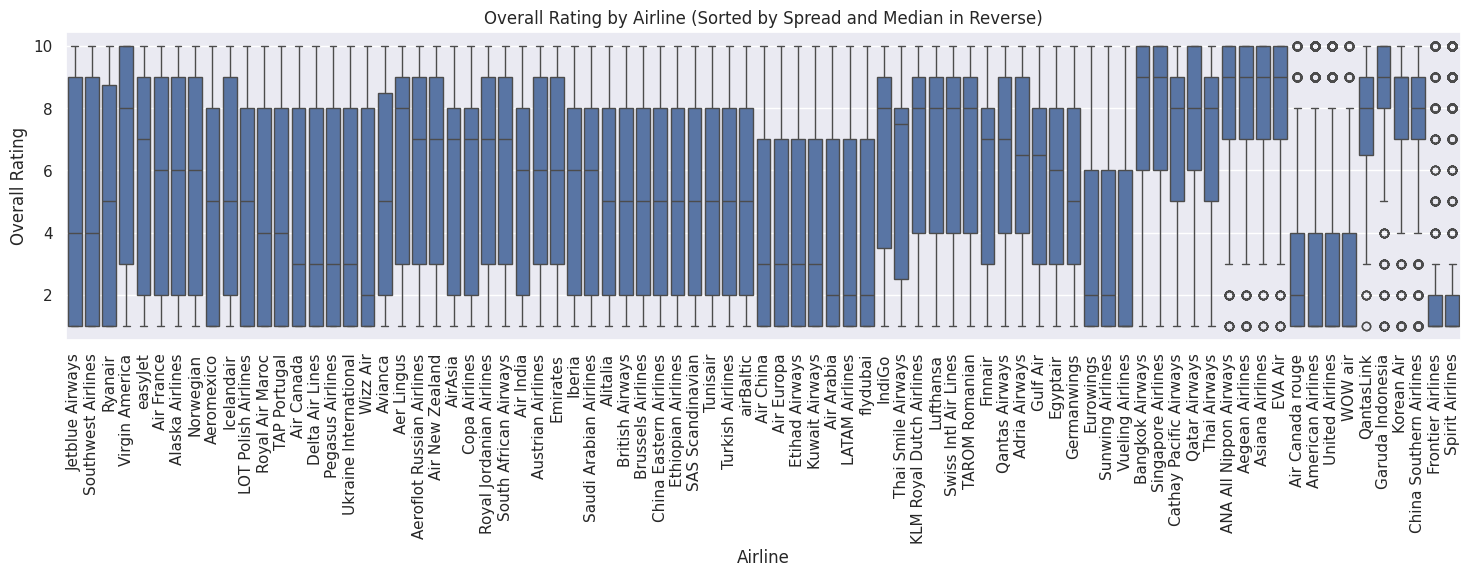

In [ ]:
# Create a copy of the relevant columns from df to avoid modifying the original DataFrame
df_copy = df[['airline', 'overall']].copy()

# Calculate the interquartile range (IQR) and median for each airline
iqr_median = df_copy.groupby('airline')['overall'].agg(IQR=lambda x: x.quantile(0.75) - x.quantile(0.25), median='median')

# Sort by IQR in descending order and by median in descending order
sorted_airlines = iqr_median.sort_values(by=['IQR', 'median'], ascending=[False, False]).index

# Reorder the airline column in the copied DataFrame
df_copy['airline'] = pd.Categorical(df_copy['airline'], categories=sorted_airlines, ordered=True)

# Plot the boxplot using the copied DataFrame
plt.figure(figsize=(18, 4))
sns.boxplot(x='airline', y='overall', data=df_copy)
plt.title('Overall Rating by Airline (Sorted by Spread and Median in Reverse)')
plt.xticks(rotation=90)
plt.xlabel('Airline')
plt.ylabel('Overall Rating')
plt.show()



*   The graph shows how the users rated the experience on different airlines



#### Cabin VS Cabin Service

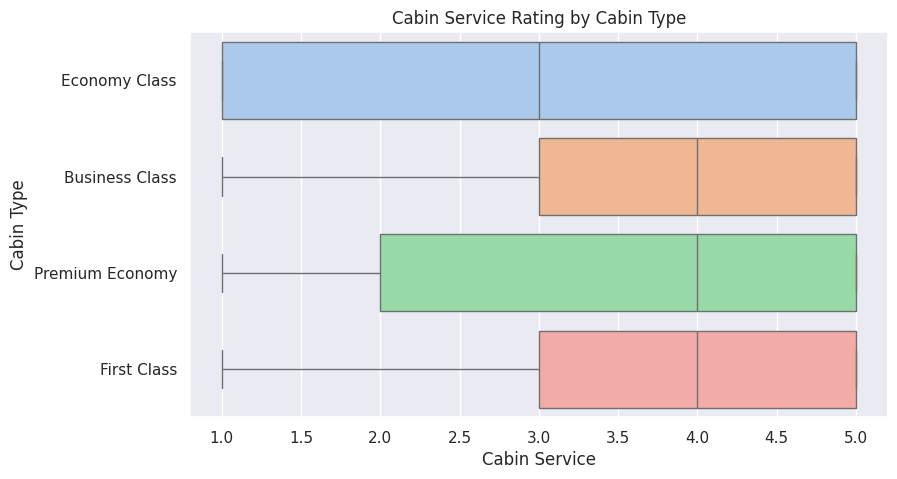

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot( x='cabin_service', y='cabin', data=df, palette='pastel')
plt.title('Cabin Service Rating by Cabin Type')
plt.ylabel('Cabin Type')
plt.xlabel('Cabin Service')
plt.show()



*   A box plot not only shows the central tendency which might mislead but also the spread of the data
*   A median at high value shows that majority of the cabin are satisfied by the services provided corresponding to their cabin type



#### Trend in overall rating

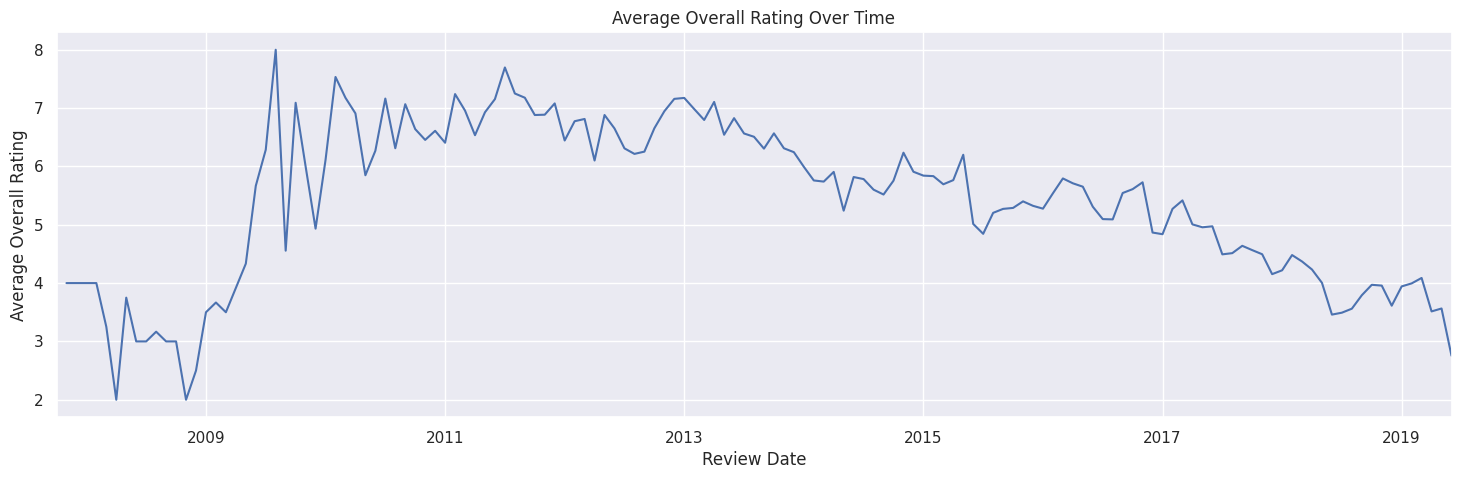

In [ ]:
plt.figure(figsize=(18,5))
df.groupby(df[df['review_date']>'2007-10-01']['review_date'].dt.to_period('M'))['overall'].mean().plot()
plt.title('Average Overall Rating Over Time')
plt.xlabel('Review Date')
plt.ylabel('Average Overall Rating')
plt.show()



*   The average overall rating has been on decline over the years



#### Cabin - traveller relation over overall

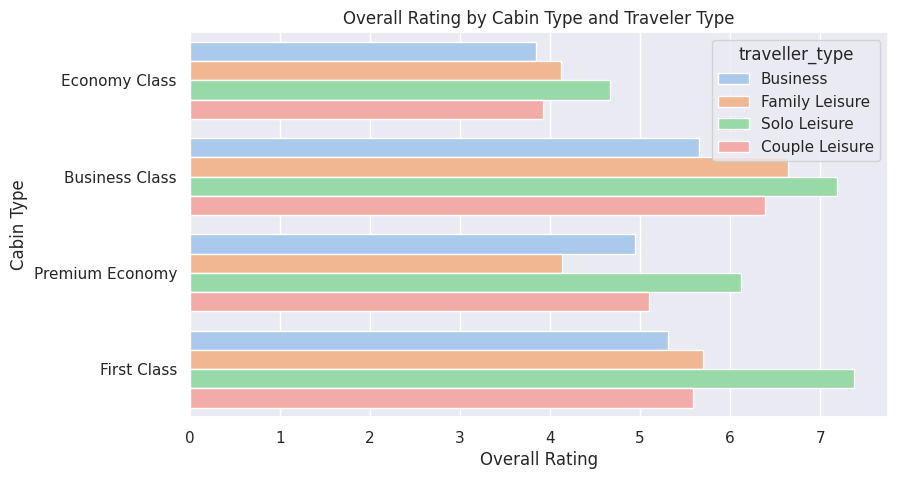

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(y='cabin', x='overall', hue='traveller_type', data=df, ci=None, palette='pastel')
plt.title('Overall Rating by Cabin Type and Traveler Type')
plt.ylabel('Cabin Type')
plt.xlabel('Overall Rating')
plt.show()



*   Interacttion between cabin and traveller over overall rating



#### Correlation Heatmap

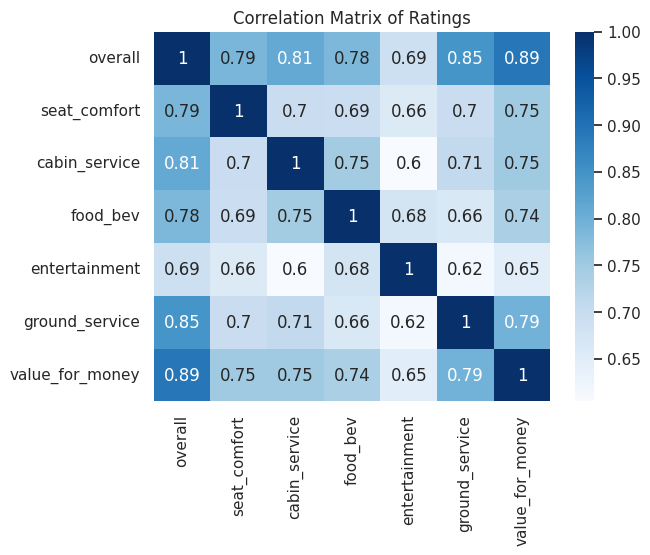

In [ ]:
# Correlation Heatmap visualization code
corr = df[['overall','seat_comfort', 'cabin_service', 'food_bev','entertainment', 'ground_service', 'value_for_money']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Correlation Matrix of Ratings')
plt.show()



*   Linear relation between numerical variables
*   Multicollinearity by overall column



## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer - Dataset only contains categorical columns


1.   Some relation exist between recommended and overall rating  
2.   Some relation exist between traveller type and food_bev
3.   Some relation exist between cabin and cabin service



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.


*   Null  Hypothesis - No relation exist between recommended and overall rating
*   Alter Hypothesis - Some relation exist between recommended and overall rating



#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Categorical - Categorical variable Chi square Test for Independence
# Create a contingency table

contingency_table = pd.crosstab(df['overall'], df['recommended'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test and calculate expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame for easier inspection
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:")
print(expected_df)

# Check if all expected frequencies are >= 5
print("Check if all expected frequencies are >= 5:")
print((expected_df >= 5).all().all())

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'overall' and 'recommended'.")
else:
    print("Fail to reject the null hypothesis: No significant association between 'overall' and 'recommended'.")


Contingency Table:
recommended    0.0   1.0
overall                 
1.0          15683    53
2.0           5284    71
3.0           3510   125
4.0           2056   284
5.0           1852   983
6.0            727  1635
7.0            247  3853
8.0             71  6460
9.0             38  7166
10.0            39  7850
Expected Frequencies:
recommended          0.0          1.0
overall                              
1.0          8007.349095  7728.650905
2.0          2724.920844  2630.079156
3.0          1849.689499  1785.310501
4.0          1190.721713  1149.278287
5.0          1442.605153  1392.394847
6.0          1201.916533  1160.083467
7.0          2086.307276  2013.692724
8.0          3323.334834  3207.665166
9.0          3665.794540  3538.205460
10.0         4014.360512  3874.639488
Check if all expected frequencies are >= 5:
True
Chi2 Stat: 49914.62028413681
P-value: 0.0
Degrees of Freedom: 9
Reject the null hypothesis: There is a significant association between 'overall' and 'reco

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.


*   Null  Hypothesis - No relation exist between traveller type and food_bev
*   Alter Hypothesis - Some relation exist between traveller type and food_bev

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Categorical - Categorical variable Chi square Test for Independence
# Create a contingency table

contingency_table = pd.crosstab(df['traveller_type'], df['food_bev'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test and calculate expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame for easier inspection
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:")
print(expected_df)

# Check if all expected frequencies are >= 5
print("Check if all expected frequencies are >= 5:")
print((expected_df >= 5).all().all())

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'traveller_type' and 'food_bev'.")
else:
    print("Fail to reject the null hypothesis: No significant association between 'traveller_type' and 'food_bev'.")


Contingency Table:
food_bev         1.0   2.0   3.0   4.0   5.0
traveller_type                              
Business        1748   868   930  1076   924
Couple Leisure  2566  1086  1297  1259  1338
Family Leisure  1880   737   934   984   999
Solo Leisure    2818  1398  1957  2362  2493
Expected Frequencies:
food_bev                1.0          2.0          3.0          4.0  \
traveller_type                                                       
Business        1685.457341   764.739799   957.187159  1062.481486   
Couple Leisure  2293.267418  1040.520469  1302.368247  1445.633844   
Family Leisure  1681.810481   763.085115   955.116072  1060.182572   
Solo Leisure    3351.464760  1520.654617  1903.328522  2112.702098   

food_bev                5.0  
traveller_type               
Business        1076.134215  
Couple Leisure  1464.210022  
Family Leisure  1073.805760  
Solo Leisure    2139.850003  
Check if all expected frequencies are >= 5:
True
Chi2 Stat: 327.55293620381593
P-value: 

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.


*   Null  Hypothesis - No relation exist between cabin and cabin service
*   Alter Hypothesis - Some relation exist between cabin and cabin service

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Categorical - Categorical variable Chi square Test for Independence
# Create a contingency table

contingency_table = pd.crosstab(df['cabin'], df['cabin_service'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-Square test and calculate expected frequencies
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Convert expected frequencies to a DataFrame for easier inspection
expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)
print("Expected Frequencies:")
print(expected_df)

# Check if all expected frequencies are >= 5
print("Check if all expected frequencies are >= 5:")
print((expected_df >= 5).all().all())

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

# Set the significance level
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between 'cabin' and 'cabin_service'.")
else:
    print("Fail to reject the null hypothesis: No significant association between 'cabin' and 'cabin_service'.")


Contingency Table:
cabin_service      1.0   2.0   3.0   4.0    5.0
cabin                                          
Business Class     993   823  1106  1914   4399
Economy Class    11452  5345  6497  7809  11185
First Class        211   123   169   266    718
Premium Economy    514   292   315   456    784
Expected Frequencies:
cabin_service             1.0          2.0          3.0          4.0  \
cabin                                                                  
Business Class    2196.546026  1097.939445  1348.782666  1742.059472   
Economy Class    10058.206642  5027.575879  6176.212386  7977.066696   
First Class        353.683155   176.787867   217.178108   280.502700   
Premium Economy    561.564176   280.696809   344.826841   445.371133   

cabin_service             5.0  
cabin                          
Business Class    2849.672392  
Economy Class    13048.938397  
First Class        458.848170  
Premium Economy    728.541041  
Check if all expected frequencies are >= 5:
Tr

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1.1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df.isna().sum()

airline                0
overall             1781
author                 0
review_date            0
customer_review        0
aircraft           42686
traveller_type     23636
cabin               2477
route              23663
departure          23663
arrival            23663
layover            23663
date_flown         23742
seat_comfort        4970
cabin_service       4941
food_bev           12840
entertainment      20950
ground_service     24007
value_for_money     1855
recommended         1422
dtype: int64

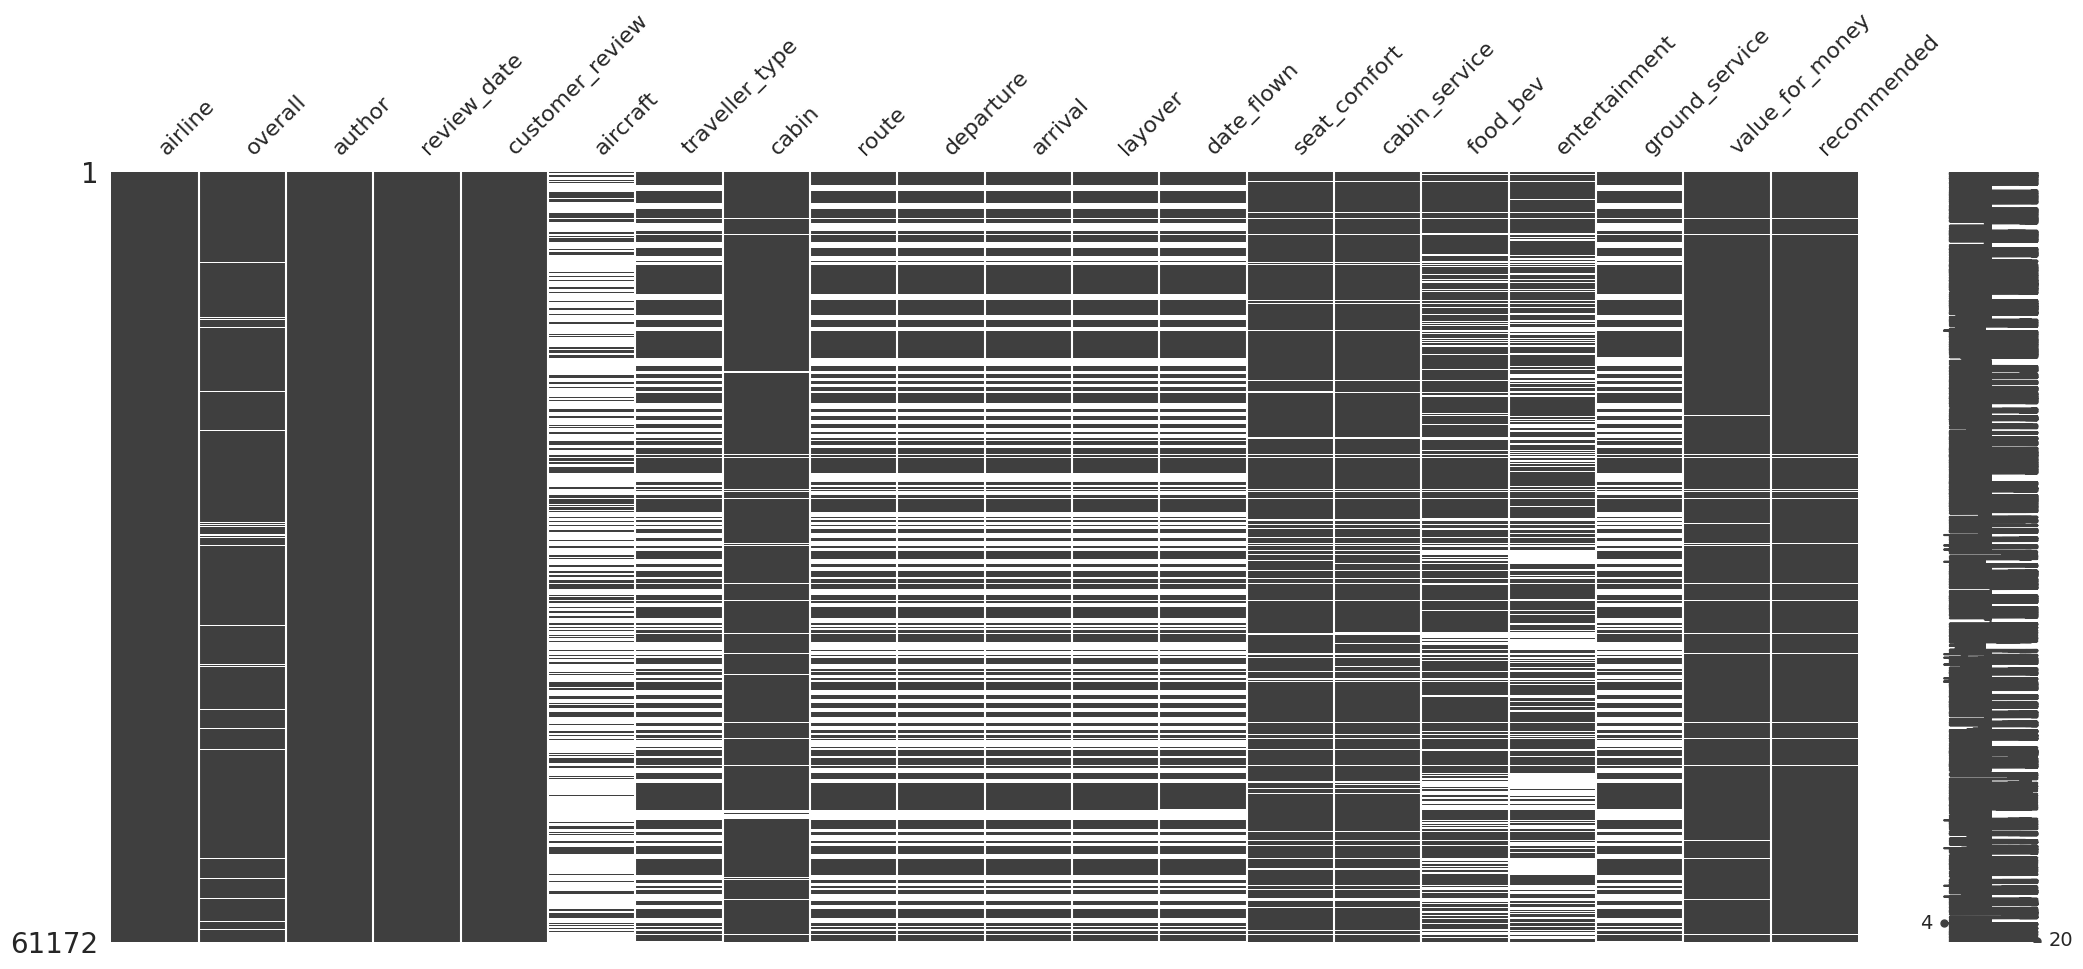

In [ ]:
msno.matrix(df)
plt.show()

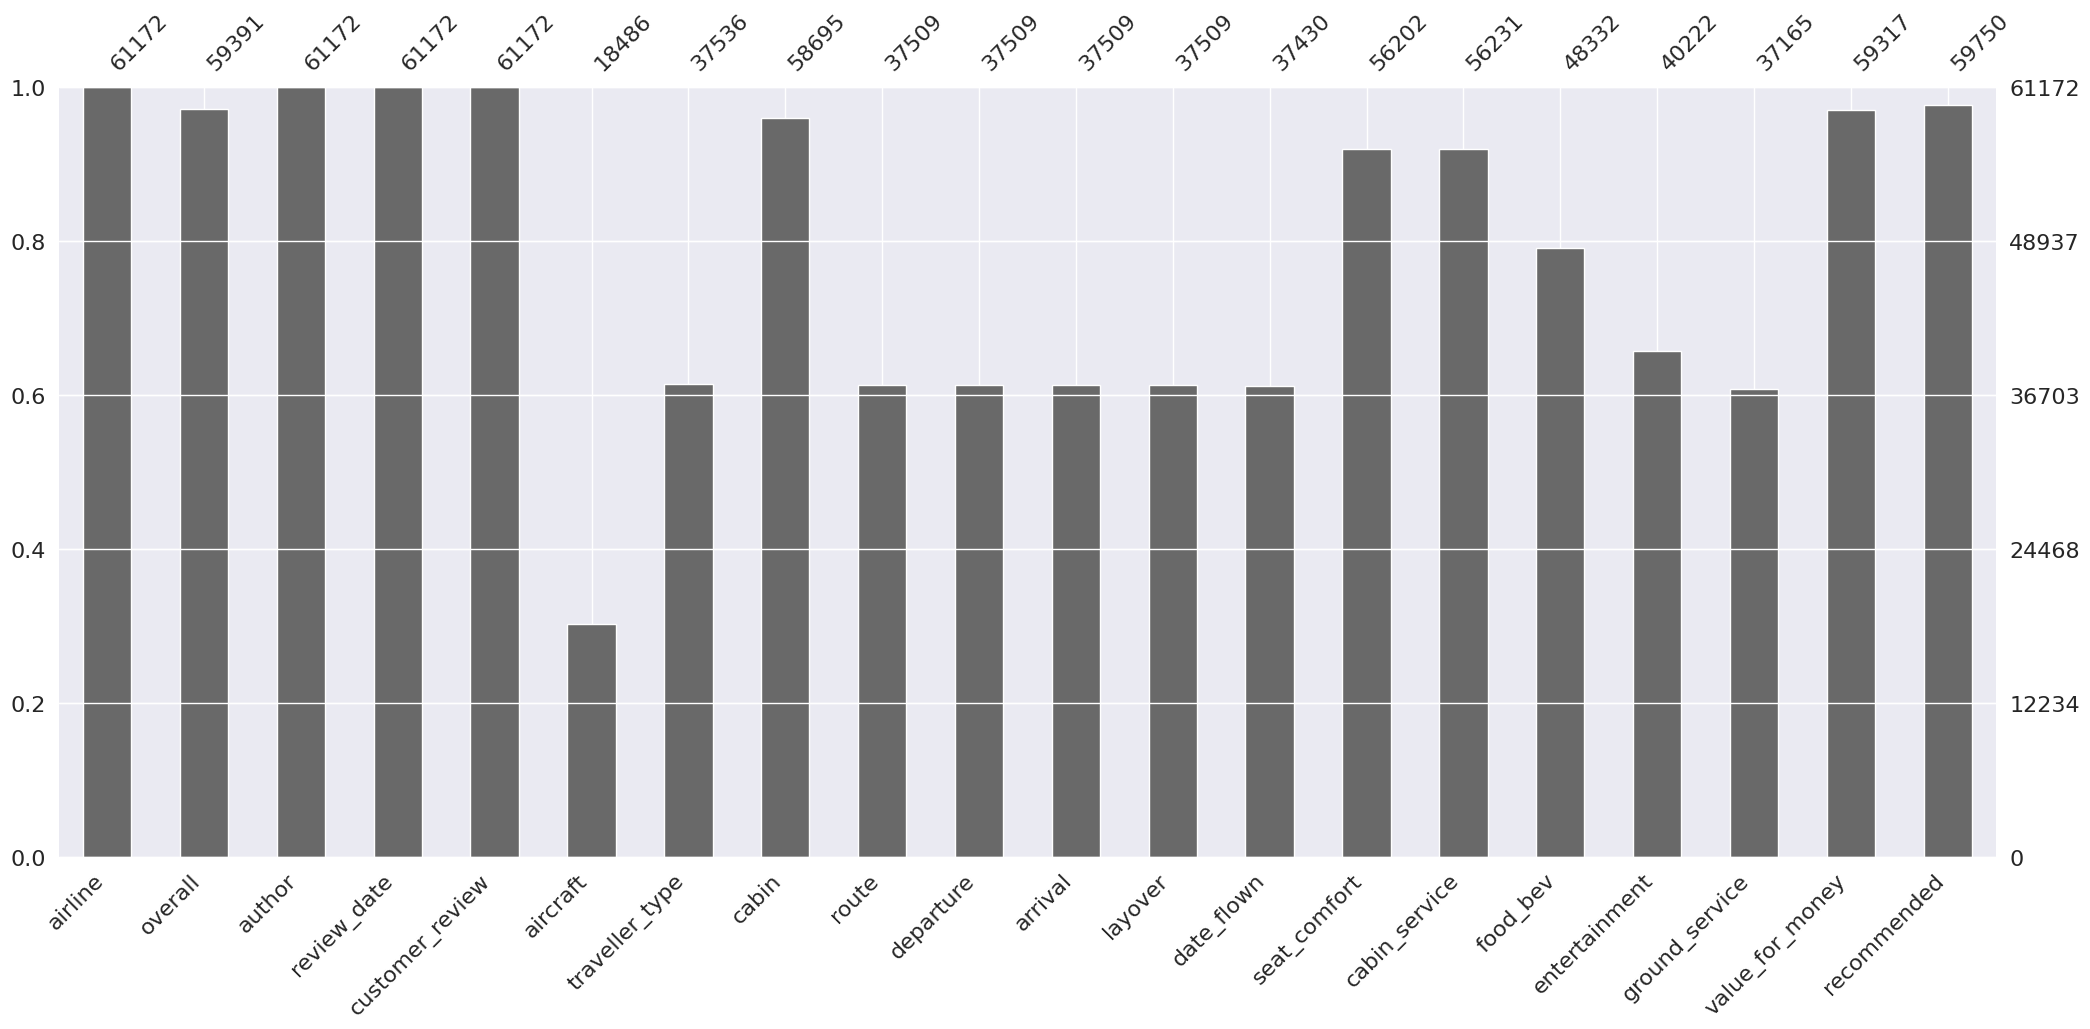

In [ ]:
msno.bar(df)
plt.show()

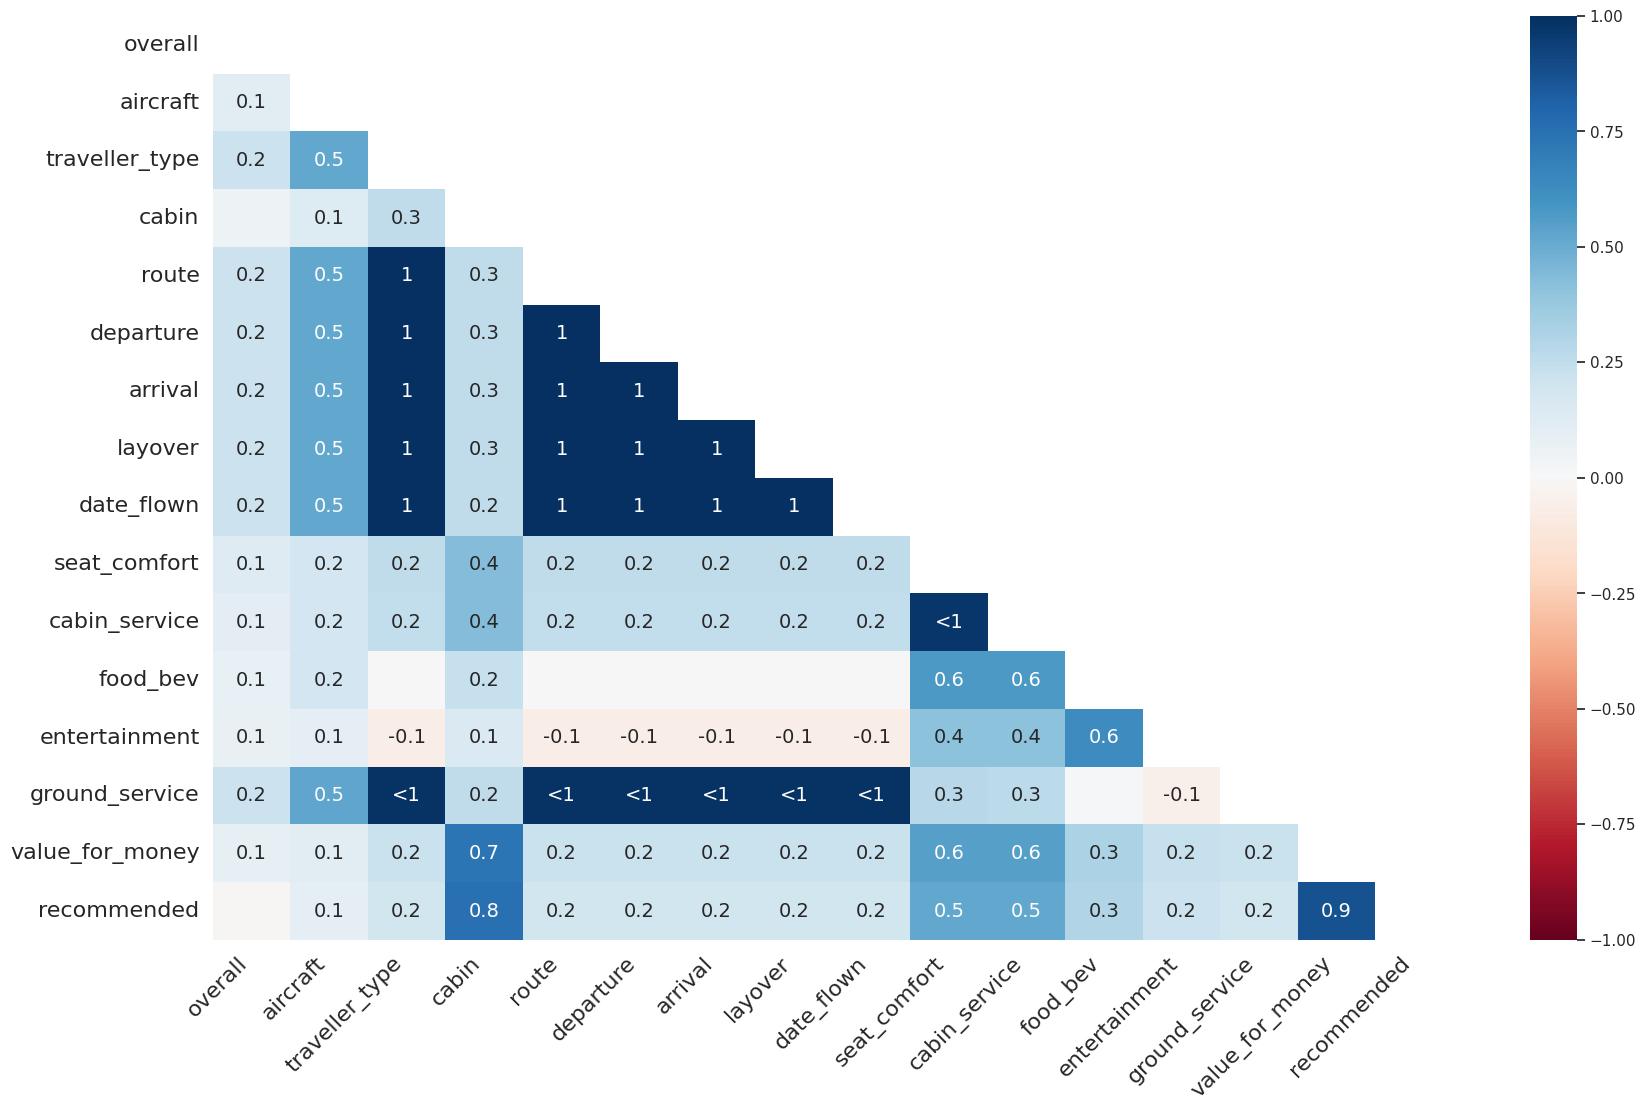

In [ ]:
msno.heatmap(df)
plt.show()

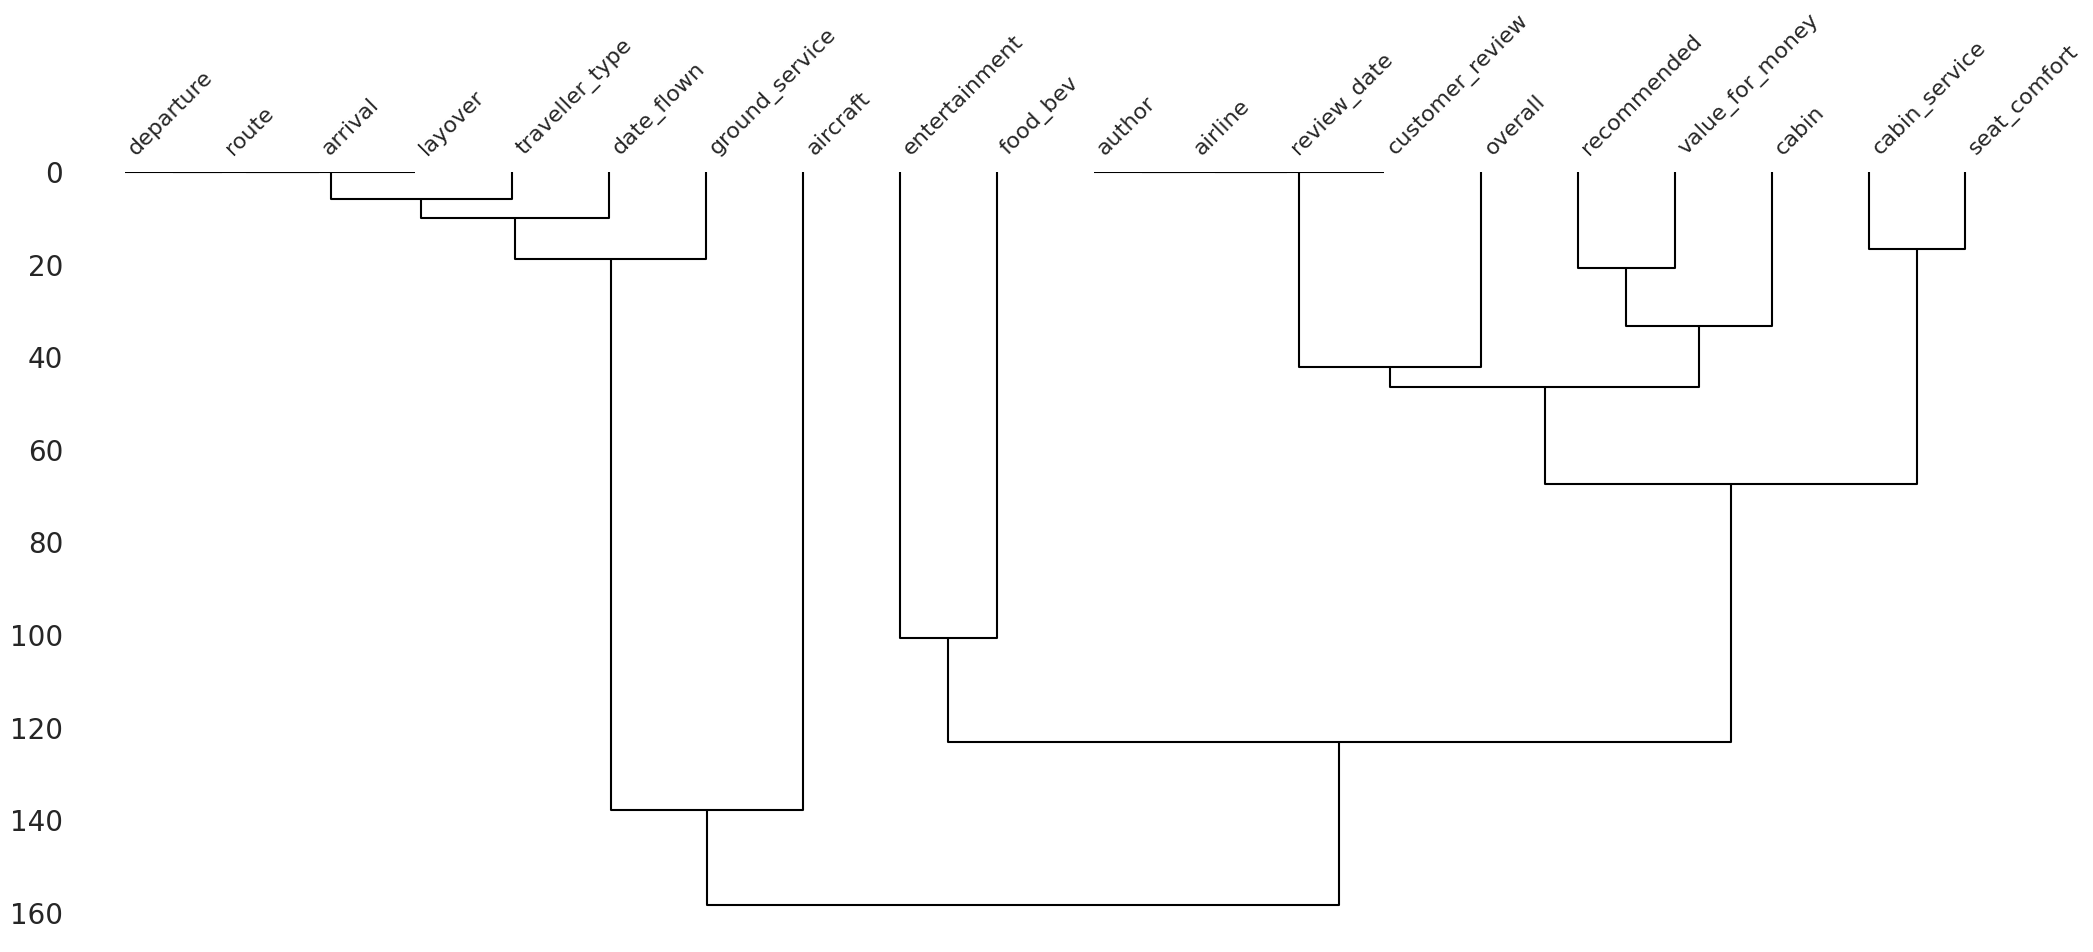

In [ ]:
msno.dendrogram(df)
plt.show()

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'departure', 'arrival',
       'layover', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

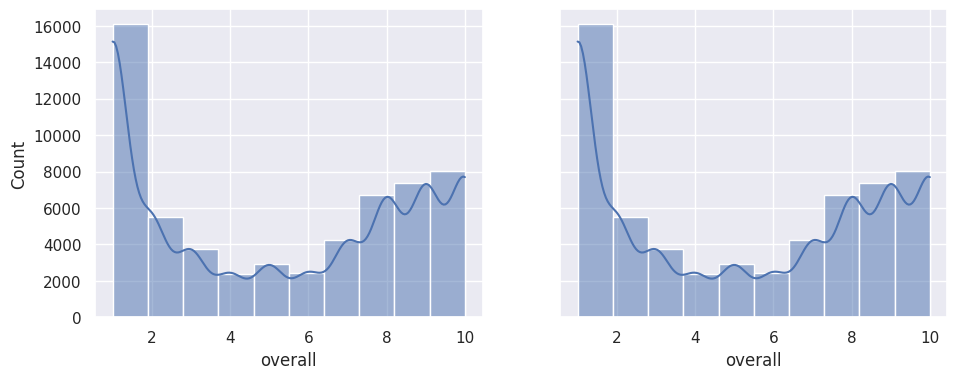

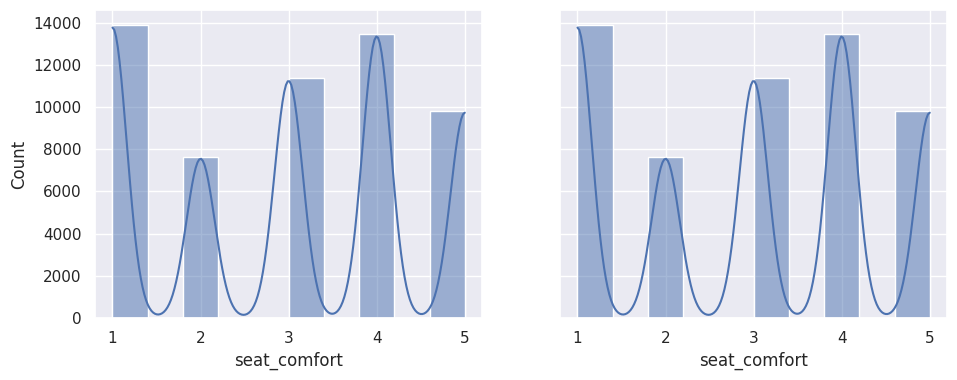

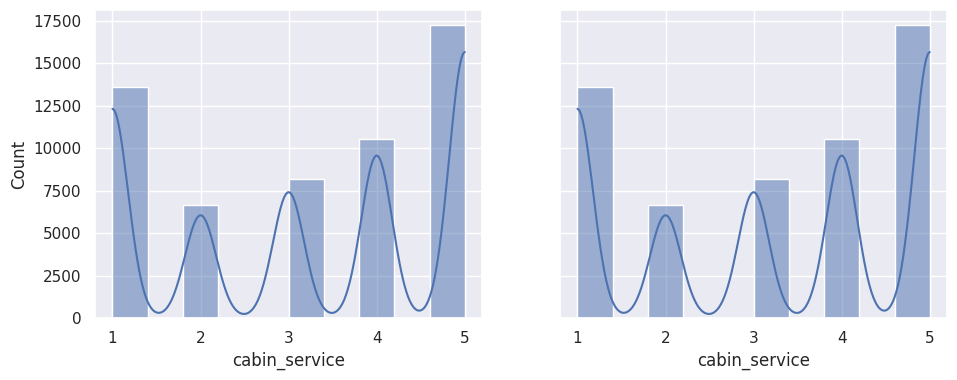

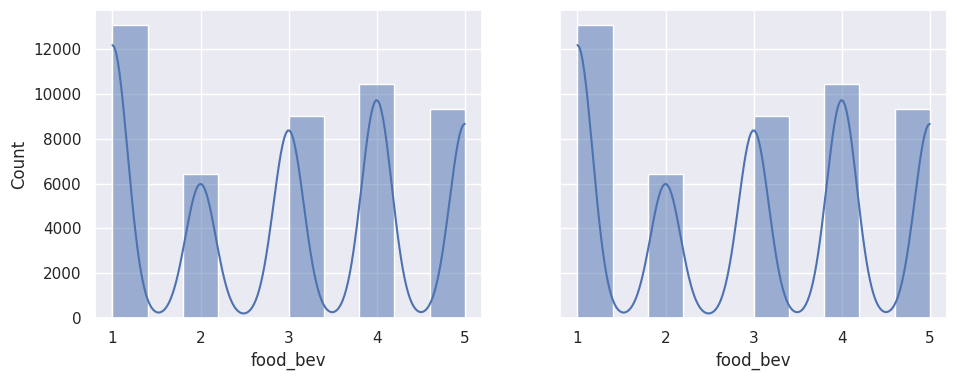

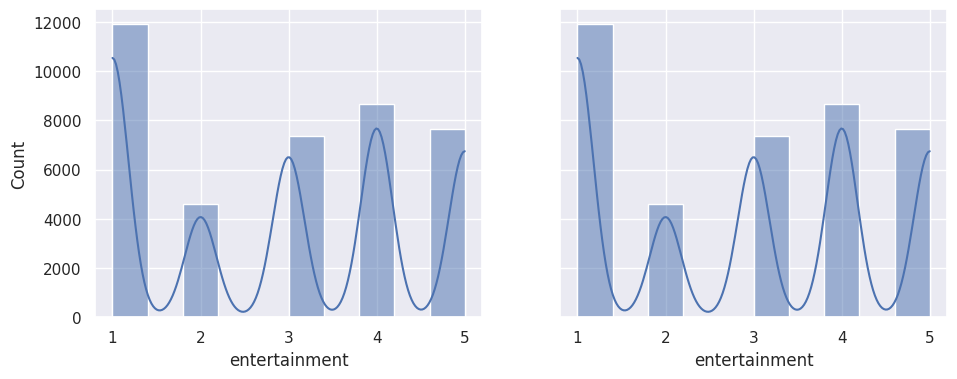

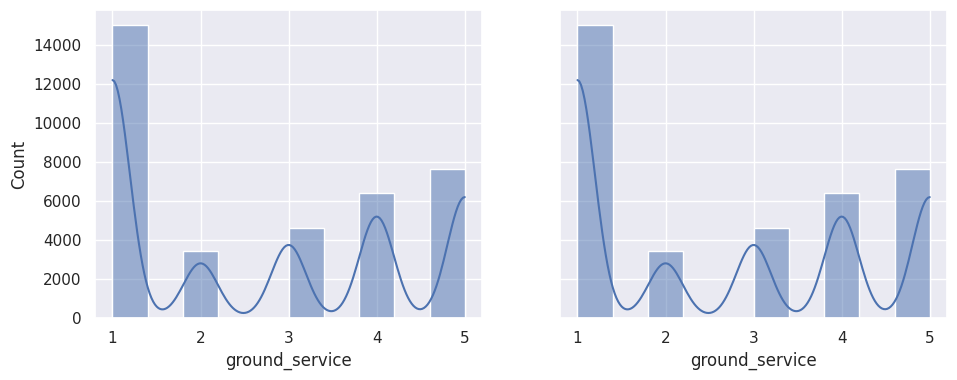

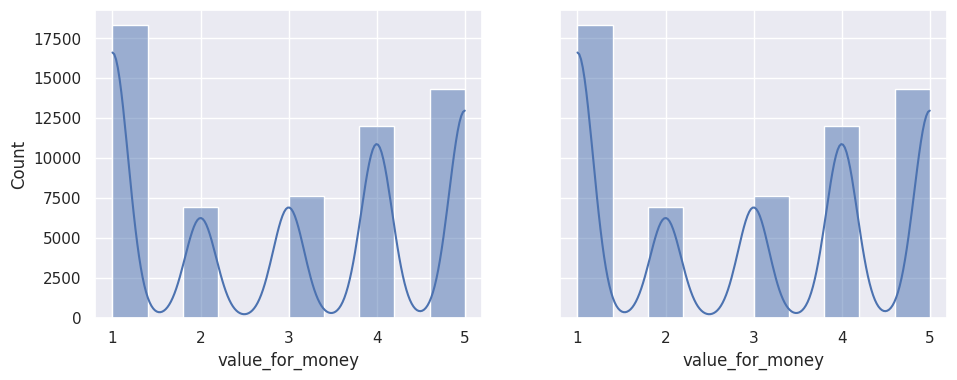

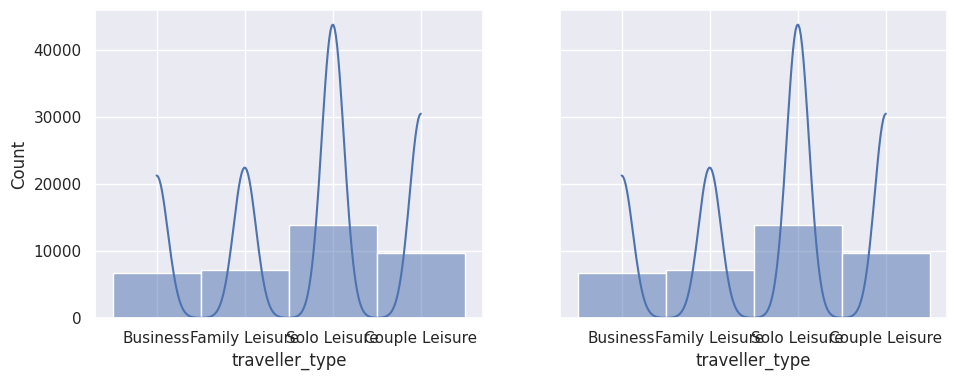

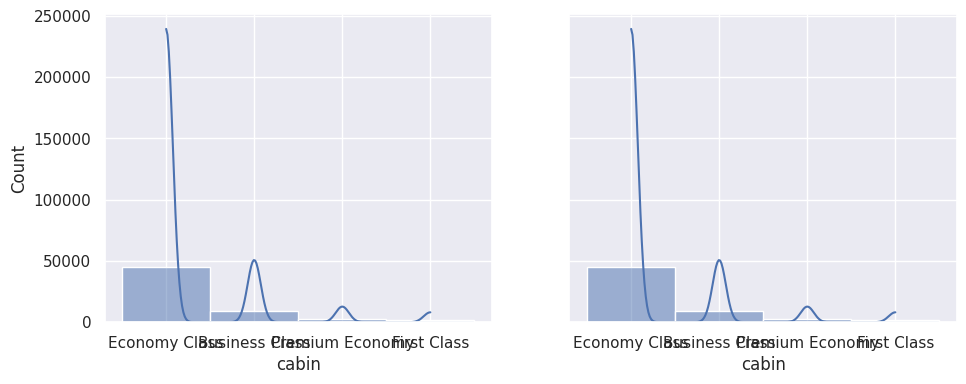

In [ ]:
for i in ['overall','seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money','traveller_type', 'cabin',]:
  fig,axes=plt.subplots(1,2,figsize=(11,4),sharey=True)
  sns.histplot(df[i],bins=10,kde=True,ax=axes[0])
  sns.histplot(df[i].dropna(),bins=10,kde=True,ax=axes[1])
  plt.show()


In [ ]:
# Create a missingness indicator for each column
df_missing_indicators = df.isnull().astype(int)

# Correlate the missingness with other variables
for col in df.columns:
    if df[col].isnull().any():
        corr = df_missing_indicators.corrwith(df[col].isnull().astype(int))
        print(f"Correlation of missingness in '{col}' with other variables:\n{corr}\n")

Correlation of missingness in 'overall' with other variables:
airline                 NaN
overall            1.000000
author                  NaN
review_date             NaN
customer_review         NaN
aircraft           0.113748
traveller_type     0.218027
cabin              0.048777
route              0.217824
departure          0.217824
arrival            0.217824
layover            0.217824
date_flown         0.217232
seat_comfort       0.130004
cabin_service      0.102106
food_bev           0.084322
entertainment      0.071109
ground_service     0.215262
value_for_money    0.088451
recommended       -0.015100
dtype: float64

Correlation of missingness in 'aircraft' with other variables:
airline                 NaN
overall            0.113748
author                  NaN
review_date             NaN
customer_review         NaN
aircraft           1.000000
traveller_type     0.521987
cabin              0.133022
route              0.522253
departure          0.522253
arrival            

** Based on correlation we can say that Ground service, traveller type, route and date flown, departure, arrival and layover follow MAR type missing values and rest follows MCAR type missing values**

Since most of the columns is categorical in nature, mean, median impution not possible a.w.a most frequent for cat also not possible because not a single category is too dominant in an individual Column'
MAR on categorical also not possible for high correlartion columns
only option is to drop the data, but its not as bad as it will give us the cleanest data possible which will be free from bias

### 1.2. Dropping ambiguous columns

In [ ]:
# Let's remove a few useless column that might cause us valuable information loss
# df=df.drop(['author','aircraft','route','date_flown','departure','arrival'],axis=1)

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'departure', 'arrival',
       'layover', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
df['author'] # use no more

0        Christopher Hackley
1              Adriana Pisoi
2                  M Galerko
3                Zeshan Shah
4                 Pooja Jain
                ...         
61167    Yevheniy Kahanovych
61168              Helen Lee
61169       Andriy Yesypenko
61170      Volodya Bilotkach
61171        Kasper Hettinga
Name: author, Length: 61172, dtype: object

In [ ]:
df['aircraft'] # ambiguous in nature

0         NaN
1         NaN
2         NaN
3        A330
4         NaN
         ... 
61167     NaN
61168     NaN
61169     NaN
61170     NaN
61171     NaN
Name: aircraft, Length: 61172, dtype: object

In [ ]:
df['aircraft'].value_counts()

aircraft
A320                         2130
A380                         1109
Boeing 777                   1100
Boeing 737-800               1021
A330                          974
                             ... 
Boeing 777-200 / 757-300        1
CRJ-700 (and others)            1
Crj200                          1
Embraer, Boeing 777 / 787       1
boeing 767                      1
Name: count, Length: 2088, dtype: int64

In [ ]:
def air(text):
  if type(text)==str:
    text=text.lower()
    pattern=re.compile(r'[a-zA-Z]+')
    lst=pattern.findall(text)
    return lst
  else:
    return []
aircraft=df['aircraft'].apply(air)
aircraft_values = list(set(chain.from_iterable(aircraft)))

In [ ]:
len(aircraft_values)

193

In [ ]:
df['route'] # contains a mix of arrival, departure annd layover upon a mixture of places, locations and airports

0          London to Izmir via Istanbul
1                 Istanbul to Bucharest
2        Rome to Prishtina via Istanbul
3          Washington Dulles to Karachi
4         Mumbai to Dublin via Istanbul
                      ...              
61167                               NaN
61168                               NaN
61169                               NaN
61170                               NaN
61171                               NaN
Name: route, Length: 61172, dtype: object

In [ ]:
route = list(map(lambda x : x.lower().split() if type(x)==str else [],df['route'].values.tolist()))
route_values = list(set(chain.from_iterable(route)))

In [ ]:
len(route_values)

3338

In [ ]:
df['departure'] # mixture of places and airports

0                   London
1                 Istanbul
2                     Rome
3        Washington Dulles
4                   Mumbai
               ...        
61167                  NaN
61168                  NaN
61169                  NaN
61170                  NaN
61171                  NaN
Name: departure, Length: 61172, dtype: object

In [ ]:
df['arrival'] #  mixture of places and airports

0            Izmir
1        Bucharest
2        Prishtina
3          Karachi
4           Dublin
           ...    
61167          NaN
61168          NaN
61169          NaN
61170          NaN
61171          NaN
Name: arrival, Length: 61172, dtype: object

In [ ]:
df['date_flown'] # month granularity

0       2019-05-01
1       2019-05-01
2       2019-05-01
3       2019-04-01
4       2019-05-01
           ...    
61167          NaT
61168          NaT
61169          NaT
61170          NaT
61171          NaT
Name: date_flown, Length: 61172, dtype: datetime64[ns]

In [ ]:
dates_comparision=pd.DataFrame({'review_day':df['review_date'].dt.day,'flown_day':df['date_flown'].dt.day,'review_month':df['review_date'].dt.month,'flown_month':df['date_flown'].dt.month,'review_year':df['review_date'].dt.year,'flown_year':df['date_flown'].dt.year})

In [ ]:
dates_comparision # after looking at dates I have come to decide to loose flown_date for its incompleteness and substitue it with review date

review_day  flown_day  review_month  flown_month  review_year  \
0               8        1.0             5          5.0         2019   
1               7        1.0             5          5.0         2019   
2               7        1.0             5          5.0         2019   
3               6        1.0             5          4.0         2019   
4               6        1.0             5          5.0         2019   
...           ...        ...           ...          ...          ...   
61167          21        NaN             1          NaN         2007   
61168          15        NaN            12          NaN         2006   
61169          19        NaN             5          NaN         2006   
61170          29        NaN             4          NaN         2006   
61171          10        NaN             2          NaN         2006   

       flown_year  
0          2019.0  
1          2019.0  
2          2019.0  
3          2019.0  
4          2019.0  
...           ...  
61167         NaN  
61168         NaN  
61169         NaN  
61170         NaN  
61171         NaN  

[61172 rows x 6 columns]

In [ ]:
df.shape

(61172, 20)

In [ ]:
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'departure', 'arrival',
       'layover', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev',
       'entertainment', 'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
df=df.drop(['author','aircraft','route', 'departure', 'arrival','date_flown',],axis=1)

In [ ]:
df.shape

(61172, 14)

In [ ]:
df.columns

Index(['airline', 'overall', 'review_date', 'customer_review',
       'traveller_type', 'cabin', 'layover', 'seat_comfort', 'cabin_service',
       'food_bev', 'entertainment', 'ground_service', 'value_for_money',
       'recommended'],
      dtype='object')

### 1.3. Dropping missing value rows

In [ ]:
df.shape

(61172, 14)

In [ ]:
shape0=df.shape

In [ ]:
# Remove rows from the original DataFrame where all selected columns in the subset are null
df = df.dropna()
df=df.drop(df[df['customer_review'].apply(len)==0].index,axis=0)
df=df.reset_index(drop=True)

In [ ]:
df.shape

(22813, 14)

In [ ]:
shape1=df.shape

In [ ]:
print("fracton of data remaing of original : ",shape1[0]/shape0[0])

fracton of data remaing of original :  0.3729320604197999


In [ ]:
proper_types={'overall':'int64',
        'seat_comfort':'int64',
        'cabin_service':'int64',
        'food_bev':'int64',
        'entertainment':'int64',
        'ground_service':'int64',
        'value_for_money':'int64',
        'layover':'int64',
        'recommended':'int64'}
df=df.astype(proper_types)

In [ ]:
df.dtypes

airline                    object
overall                     int64
review_date        datetime64[ns]
customer_review            object
traveller_type             object
cabin                      object
layover                     int64
seat_comfort                int64
cabin_service               int64
food_bev                    int64
entertainment               int64
ground_service              int64
value_for_money             int64
recommended                 int64
dtype: object

In [ ]:
# df.to_csv('cleaned_airline_reviews.csv',index=False) # saving cleaned data for later use

### 2.1. Textual Data Preprocessing

In [ ]:
df['customer_review']

0         First time Iâ€™d flown TK. I found them very ...
1         We make our check in in the airport, they Tak...
2         I flew with this company several times in the...
3         Turkish Airlines has consistently maintained ...
4         Never book Turkish airlines if you are travel...
                               ...                        
22808     My family and I had a round trip from Clevela...
22809     I learned that the flight was cancelled at th...
22810     We were offered an option of upgrading to bus...
22811     Being on a transit flight first, I had to mov...
22812     I flew from Athens (5.30am) to Kiev (laid ove...
Name: customer_review, Length: 22813, dtype: object

In [ ]:
text_df=df[['recommended','customer_review']]

In [ ]:
text_df.isna().sum()

recommended        0
customer_review    0
dtype: int64

In [ ]:
text_df['customer_review'].duplicated().sum()

0

In [ ]:
text_df['customer_review'].shape

(22813,)

In [ ]:
# Lower Casing
text_df['customer_review']=text_df['customer_review'].str.lower()

In [ ]:
# remove leading and trailing white spaces
text_df['customer_review']=text_df['customer_review'].str.strip()

In [ ]:
# cleaning
def string_cleaning(string):
  string=string.replace('€™',"'",)
  string=string.replace('â€™', "'",)
  string=string.replace('â', '',)
  string=string.replace('ä°','i',)
  string=string.replace('€˜','',)
  string=string.replace('€','',)
  string=string.replace('€™','',)
  string=string.replace('£','')
  string=string.replace('œ','')
  string=string.replace('è™','')
  return string

text_df['customer_review']=text_df['customer_review'].apply(string_cleaning)

In [ ]:
# expanding contractions
def expand(string):
  string=contractions.fix(string)
  return string

text_df['customer_review']=text_df['customer_review'].apply(expand)

In [ ]:
# # spell correction
# def spelling_correction(text):
#   return TextBlob(text).correct().string

# text_df['customer_review']=text_df['customer_review'].apply(spelling_correction)

In [ ]:
# text_df['customer_review'].to_csv('correct_spelled_review.csv',index=False)

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/Hercules2310/Airline-Referral-Prediction/main/correct_spelled_review.csv')

In [ ]:
text_df['customer_review']=pd.DataFrame(data)['customer_review']

In [ ]:
# removing URL
text_df['customer_review']=text_df['customer_review'].str.replace(r'https?//\S+|www\S+','',regex=True)

In [ ]:
# removing digits
def remove_digits(string):
  string=re.sub(r'\w*\d+\w*', '', string)
  return string

text_df['customer_review']=text_df['customer_review'].apply(remove_digits)

In [ ]:
# handling punctuations
def remove_punctuation(text):
  return text.translate(str.maketrans('', '', string.punctuation))

text_df['customer_review'] = text_df['customer_review'].apply(remove_punctuation)

In [ ]:
# tokenize
text_df['tokenized_customer_review']=text_df['customer_review'].apply(word_tokenize)

In [ ]:
# removing stopwords
def remove_stopwords(lst):
  return [i for i in lst if i not in stopword]

stopword = stopwords.words('english')

text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(remove_stopwords)

In [ ]:
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# removing airline info
def remove_airline(lst):
  return [i for i in lst if i not in airlines_values]


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(remove_airline)

In [ ]:
print(airlines_values)

['scandinavian', 'alitalia', 'arabia', 'southwest', 'emirates', 'norwegian', 'saudi', 'indigo', 'brussels', 'frontier', 'pegasus', 'flydubai', 'british', 'south', 'jordanian', 'arabian', 'united', 'russian', 'india', 'romanian', 'lufthansa', 'sas', 'austrian', 'portugal', 'asiana', 'icelandair', 'eastern', 'air', 'tunisair', 'aeromexico', 'swiss', 'china', 'qantas', 'intl', 'zealand', 'wizz', 'american', 'pacific', 'ana', 'royal', 'bangkok', 'turkish', 'egyptair', 'qatar', 'ryanair', 'germanwings', 'canada', 'alaska', 'europa', 'ukraine', 'airbaltic', 'lingus', 'eurowings', 'jetblue', 'new', 'france', 'lot', 'gulf', 'indonesia', 'delta', 'sunwing', 'airlines', 'singapore', 'finnair', 'all', 'spirit', 'aer', 'wow', 'smile', 'klm', 'latam', 'southern', 'virgin', 'etihad', 'international', 'easyjet', 'rouge', 'maroc', 'kuwait', 'adria', 'ethiopian', 'america', 'aegean', 'vueling', 'polish', 'tarom', 'korean', 'cathay', 'dutch', 'garuda', 'iberia', 'airasia', 'tap', 'avianca', 'eva', 'thai

In [ ]:
# cleaning route_values

def clean_route_values(lst):
  text= ' '.join(lst)
  text = text.translate(str.maketrans('', '', string.punctuation))
  return text.split()

route_values=clean_route_values(route_values)

In [ ]:
# removing route info
def remove_route_info(lst):
  return [i for i in lst if i not in route_values]


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(remove_route_info)

In [ ]:
print(route_values)

['au', 'westchester', 'yai', 'kishinev', 'denpasarbali', 'buf', 'prince', 'boston', 'lin', 'ponta', 'wdh', 'tms', 'menderes', 'rabat', 'oer', 'stansted', 'riga', 'vail', 'mlu', 'bon', 'cdg', 'leeds', 'toi', 'copenhagen', 'sux', 'madrid', 'sharjah', 'glasgow', 'mebourne', 'valencia', 'city', 'guadalajara', 'suceava', 'milano', 'pnq', 'islip', 'roatan', 'tahiti', 'brazil', 'lbo', 'lynchburg', 'frankfurth', 'vieewr', 'bodrum', 'toulon', 'nh', 'gfk', 'lhrbom', 'cdg', 'girona', 'salaam', 'ict', 'junction', 'kansas', 'xry', 'aviv', 'jamaica', 'glasgowamsterdamstockholm', 'peshawar', 'vilnius', 'poz', 'chitose', 'basel', 'bemidji', 'bud', 'cbr', 'perugia', 'accra', 'duabi', 'ordden', 'msn', 'bxh', 'mosinee', 'ordclt', 'ercan', 'flint', 'me', 'lima', 'okinawa', 'dayton', 'wlg', 'abe', 'hatay', 'melourne', 'shenyang', 'latrobe', 'dubai', 'azo', 'memphis', 'ayq', 'nc', 'sunshine', 'han', 'ana', 'port', 'ovb', 'mlb', 'shenzhen', 'gzp', 'ithaca', 'queretaro', 'kahluhi', 'urumqi', 'blz', 'iasi', 't

In [ ]:
# pos tagging
def tagging(lst):
  return pos_tag(lst)


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(tagging)

In [ ]:
# stemming and lematization

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def lemmatization(lst):
  return [WordNetLemmatizer().lemmatize(tupple[0], get_wordnet_pos(tupple[1])) for tupple in lst]


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(lemmatization)

In [ ]:
text_df['tokenized_customer_review']

0        [first, time, would, fly, found, good, cabin, ...
1        [make, check, take, luggage, go, gate, gate, s...
2        [flew, company, several, time, past, year, hon...
3        [airline, consistently, maintain, quality, sin...
4        [never, book, airline, travel, lumbar, flight,...
                               ...                        
22808    [family, round, trip, u, lay, make, stop, lugg...
22809    [learn, flight, cancel, go, back, july, luggag...
22810    [offer, option, upbraid, business, class, boar...
22811    [transit, flight, first, move, quickly, get, r...
22812    [flew, laid, hour, arrive, pm, total, hour, ti...
Name: tokenized_customer_review, Length: 22813, dtype: object

In [ ]:
additional_words=['CX', 'VS', 'abu', 'af', 'afternoon', 'aircraft', 'airline', 'airport', 'aisle', 'al', 'also', 'arrival', 'arrive', 'attendant', 'ba', 'back',
          'baggage', 'be', 'bkk', 'board', 'boeing', 'business', 'cabin', 'captain', 'carry', 'cdg', 'check', 'class', 'cm', 'come', 'con', 'connect',
          'crew', 'daughter', 'day', 'dc', 'de', 'depart', 'departure', 'dhabi', 'dime', 'drink', 'dxb', 'economy', 'eg', 'eight', 'ek', 'el', 'en',
          'entertainment', 'et', 'eu', 'even', 'every', 'everyone', 'experience', 'fa', 'father', 'five', 'flight', 'fly', 'food', 'four', 'front', 'ft',
          'gate', 'get', 'go', 'ground', 'hk', 'hkg', 'hour', 'however', 'hr', 'hundred', 'ife', 'ist', 'jfk', 'johannesburg', 'journey', 'kg', 'la',
          'land', 'le', 'leave', 'lh', 'lhr', 'lounge', 'luggage', 'make', 'man', 'middle', 'min', 'minute', 'miss', 'mom', 'morning', 'moscow', 'mother',
          'mr', 'mumbai', 'night', 'nine', 'non', 'noon', 'ny', 'nz', 'oh', 'onboard', 'one', 'ons', 'pa', 'passenger', 'pe', 'people', 'pilot', 'plane',
          'pm', 'ptv', 'qf', 'qr', 'return', 'right', 'rj', 'route', 'row', 'saa', 'screen', 'seat', 'seatbelt', 'security', 'service', 'seven', 'since',
          'sir', 'six', 'son', 'soso', 'sq', 'st', 'staff', 'take', 'takeoff', 'tea', 'tell', 'ten', 'terminal', 'thousand', 'three', 'ticket', 'time',
          'tk', 'travel', 'trip', 'two', 'u', 'ua', 'uk', 'un', 'usa', 'water', 'weather', 'window', 'woman', 'â€šÂ¬','meal','wife','would']

In [ ]:
# removing words
def removing_words(lst):
  return [i for i in lst if i not in additional_words]


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(removing_words)

In [ ]:
# removing char with length_1:
def removing_char(lst):
  return [i for i in lst if len(i)>1]


text_df['tokenized_customer_review']=text_df['tokenized_customer_review'].apply(removing_char)

In [ ]:
# # Flatten the list of lists
# token_list = text_df['tokenized_customer_review'].explode()


# # word_counts = token_list.value_counts()
# token_list.value_counts().to_csv('token_excel_text.csv')

In [ ]:
def cleaned(lst):
  return ' '.join(lst)
text_df['cleaned_customer_review']=text_df['tokenized_customer_review'].apply(cleaned)

In [ ]:
text_df['customer_review'][0]

'first time i would flown to i found them very good in the air cabin crew planes food all very nice not so great on the ground ground staff call centre computer systems my flight from the was delayed so i missed the connection in istanbul most ground staff do not speak english and i was given contradictory instructions from those that could speak a little english i eventually got on a flight to izmir three hours later but it was not an easy process made worse by the vast distances one has to walk between gates in the cavernous new airport also i would phone a to call centre based in ukraine to pay an extra  or so each way for extra leg room seats however as the departure times kept changing my seats kept changing and for the return leg to london from istanbul i was not given an extra leg room seat luckily there was a spare exit row seat and the cabin crew sorted me out overall i think their cabin crew and planes are very good ground staff and call centre staff need better training and 

In [ ]:
text_df['cleaned_customer_review'][0]

'first found good great call centre computer system delay connection speak english give contradictory instruction could speak english eventually later easy process bad vast distance walk cavernous phone call centre base pay extra way extra leg room keep change keep change leg give extra leg room luckily spare exit sort overall think good call centre need good train need good computer system software work'

In [ ]:
text_df.head(3)

recommended                                    customer_review  \
0            1  first time i would flown to i found them very ...   
1            0  we make our check in in the airport they take ...   
2            0  i flew with this company several times in the ...   

                           tokenized_customer_review  \
0  [first, found, good, great, call, centre, comp...   
1  [surprise, let, child, say, overlook, wait, ch...   
2  [flew, company, several, past, year, honestly,...   

                             cleaned_customer_review  
0  first found good great call centre computer sy...  
1  surprise let child say overlook wait child clo...  
2  flew company several past year honestly say ba...

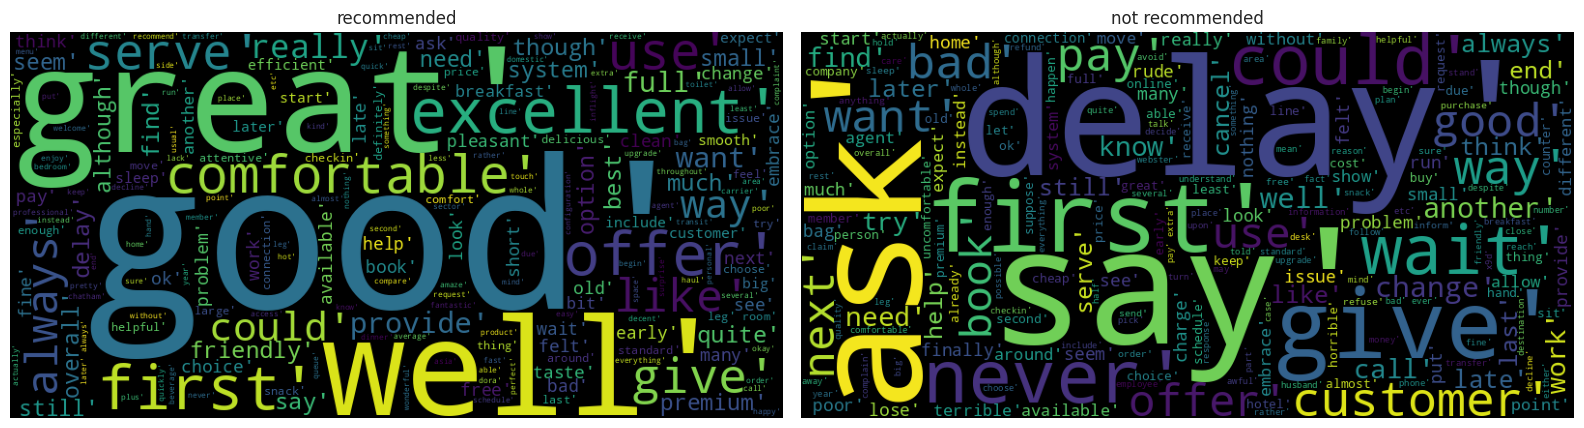

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# First word cloud
cloud1 = WordCloud(width=800, height=400).generate(" ".join(text_df[text_df['recommended']==1]['tokenized_customer_review'].apply(str)))
axes[0].set_title('recommended')
axes[0].imshow(cloud1)
axes[0].axis('off')

# Second word cloud (modify the condition as needed)
cloud2 = WordCloud(width=800, height=400).generate(" ".join(text_df[text_df['recommended']==0]['tokenized_customer_review'].apply(str)))
axes[1].set_title('not recommended')
axes[1].imshow(cloud2)
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# text_df['cleaned_customer_review'].to_csv('cleaned_textual_data.csv',index=False)

### 2.2. Textual Data to DataFrame

In [ ]:
cleaned_file=pd.read_csv('https://raw.githubusercontent.com/Hercules2310/Airline-Referral-Prediction/main/cleaned_textual_data.csv')

In [ ]:
new_df=pd.DataFrame(cleaned_file)

In [ ]:
new_df=new_df.fillna('')

In [ ]:
# text vectorization
corpus = new_df['cleaned_customer_review'].values
vectorized_text = CountVectorizer(binary=False, ngram_range=(1, 1), analyzer='word', min_df=50)
vectorized_text.fit(corpus)

CountVectorizer(min_df=50)

In [ ]:
text_features = list(vectorized_text.vocabulary_.keys())
len(text_features)

2095

In [ ]:
vec_cleaned_customer_review=vectorized_text.transform(new_df['cleaned_customer_review'])

In [ ]:
vec_cleaned_customer_review.shape

(22813, 2095)

In [ ]:
text_features_new = ['count_'+feat for feat in text_features]
text_df = pd.DataFrame(vec_cleaned_customer_review.toarray(),columns=text_features_new)

In [ ]:
text_df.head(3)

count_first  count_found  count_good  count_great  count_call  \
0            0            0           0            0           0   
1            0            0           0            0           0   
2            0            0           0            0           0   

   count_centre  count_computer  count_system  count_delay  count_connection  \
0             0               0             0            0                 0   
1             0               0             0            0                 0   
2             0               0             0            0                 0   

   ...  count_pretzel  count_pork  count_dog  count_frustrate  count_weekend  \
0  ...              0           0          0                0              0   
1  ...              0           0          0                0              0   
2  ...              1           0          0                0              0   

   count_yer  count_uniteds  count_outrageous  count_duel  count_whizz  
0          0              0                 0           0            0  
1          0              0                 0           0            0  
2          0              0                 0           0            0  

[3 rows x 2095 columns]

### 3. Feature Manipulation & Selection

In [17]:
airline = pd.read_csv('https://raw.githubusercontent.com/Hercules2310/Airline-Referral-Prediction/main/cleaned_airline_reviews.csv')

In [18]:
df = pd.DataFrame(airline)

#### 1. Feature Manipulation

In [19]:
# Manipulate Features to minimize feature correlation and create new features
df.dtypes

airline            object
overall             int64
review_date        object
customer_review    object
traveller_type     object
cabin              object
layover             int64
seat_comfort        int64
cabin_service       int64
food_bev            int64
entertainment       int64
ground_service      int64
value_for_money     int64
recommended         int64
dtype: object

In [20]:
df['review_date']=pd.to_datetime(df['review_date'])

In [21]:
df.columns.get_loc('review_date')

2

In [22]:
review_year=df['review_date'].dt.year
df.insert(loc=3, column='review_year', value=review_year, allow_duplicates=False)

In [23]:
review_month=df['review_date'].dt.month
df.insert(loc=4, column='review_month', value=review_month, allow_duplicates=False)

In [24]:
review_day=df['review_date'].dt.day
df.insert(loc=5, column='review_day', value=review_day, allow_duplicates=False)

In [25]:
df=df.drop('review_date',axis=1)

<Axes: >

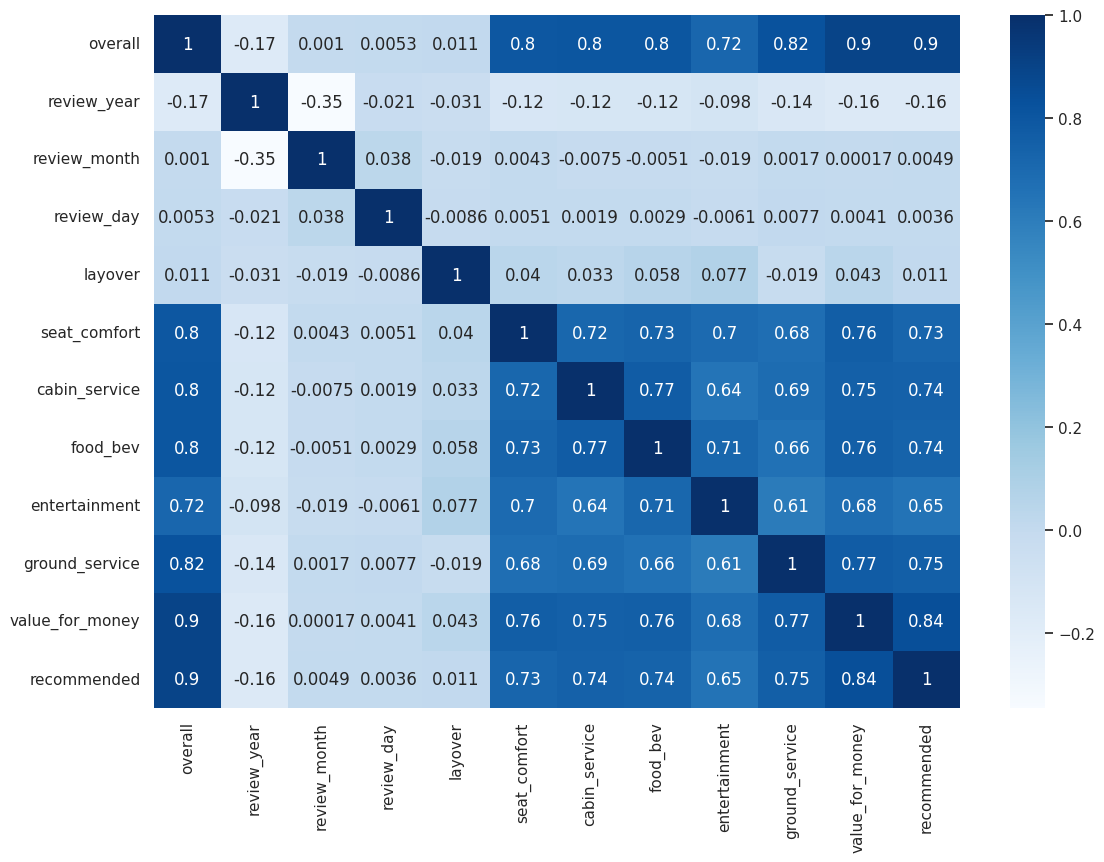

In [26]:
plt.figure(figsize=(13,9))
sns.heatmap(annot=True,cmap='Blues',data=df.select_dtypes(exclude='object').corr())

In [27]:
#Creating a function to remove multicollinear
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)
calc_vif(df[[i for i in df.select_dtypes(exclude='object').columns ]])

variables        VIF
0           overall  37.801731
1       review_year  17.070870
2      review_month   4.514862
3        review_day   4.139157
4           layover   1.657224
5      seat_comfort  16.936160
6     cabin_service  17.621542
7          food_bev  16.266076
8     entertainment  11.669312
9    ground_service  13.927816
10  value_for_money  25.748926
11      recommended  10.492023



*   overall is the highest multicollinear feature, dropping overall to reduce multicollinearity



In [28]:
df=df.drop('overall',axis=1)

#### 2. Feature Selection

In [29]:
df=df.drop(['review_day','review_month','review_year','layover'],axis=1) # features based on filter method with the least correlation

### 4. Balance Data

In [ ]:
f_rec = (df[df['recommended']==1].shape[0])/df.shape[0]
f_not_rec = (df[df['recommended']==0].shape[0])/df.shape[0]
print('Fraction of customers that recommeded the service: {:.2f}'.format(f_rec))
print('Fraction of customers that did not recommed the service: {:.2f}'.format(f_not_rec))

Fraction of customers that recommeded the service: 0.48
Fraction of customers that did not recommed the service: 0.52


### 5. LightGBM for highly dimensional sparse data (EFB Property)

In [ ]:
df.shape

(22813, 11)

In [ ]:
df.columns

Index(['airline', 'customer_review', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [ ]:
text_df.shape

(22813, 2095)

In [ ]:
merged_df= pd.concat([df,text_df],axis=1)

In [ ]:
merged_df.shape

(22813, 2106)

In [ ]:
X=merged_df.drop(['customer_review','recommended'],axis=1)
Y=merged_df['recommended']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify categorical and numerical features
categorical_features_ordinal = ['cabin']
ordinal_order = ['Economy Class', 'Premium Economy', 'Business Class', 'First Class']
categorical_features_onehot = ['airline', 'traveller_type']
numerical_features = X_train.select_dtypes(include=['int64']).columns.tolist()

# Define preprocessors for both ordinal and one-hot encodings
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories=[ordinal_order]), categorical_features_ordinal),
        ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features_onehot),
        ('num', 'passthrough', numerical_features)
    ])


In [ ]:
# Define LightGBM model
lgb_model = lgb.LGBMClassifier(
    metric='binary_logloss',
    boosting_type='gbdt',
    objective='binary',
    feature_fraction=0.5,
    num_leaves=15,
    max_depth=10,
    n_estimators=200,
    min_data_in_leaf=200,
    min_child_weight=0.1,
    reg_alpha=2,
    reg_lambda=10,
    subsample=0.8,
    verbose=-1
)

# Create a pipeline with preprocessing and LightGBM model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', lgb_model)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ord',
                                                  OrdinalEncoder(categories=[['Economy '
                                                                              'Class',
                                                                              'Premium '
                                                                              'Economy',
                                                                              'Business '
                                                                              'Class',
                                                                              'First '
                                                                              'Class']]),
                                                  ['cabin']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['airline',
                                                   'traveller_type']),
                                                 ('num', 'passthrough',
                                                  ['seat_comfort',
                                                   'cabin_service', 'food_bev',
                                                   'entertainment',
                                                   'ground_s...
                                                   'count_process', 'count_bad',
                                                   'count_vast',
                                                   'count_distance',
                                                   'count_walk', 'count_phone', ...])])),
                ('scaler', StandardScaler()),
                ('classifier',
                 LGBMClassifier(feature_fraction=0.5, max_depth=10,
                                metric='binary_logloss', min_child_weight=0.1,
                                min_data_in_leaf=200, n_estimators=200,
                                num_leaves=15, objective='binary', reg_alpha=2,
                                reg_lambda=10, subsample=0.8, verbose=-1))])

In [ ]:
# Predict on the test set
y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
y_pred = np.round(y_prob)  # Binary predictions

# Evaluate the model
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)

# Print evaluation metrics
print('Model ROC AUC score: {:.3f}'.format(roc_auc))
print('Model accuracy: {:.3f}'.format(accuracy))


In [ ]:
# Predict probabilities on training set
y_train_prob = pipeline.predict_proba(X_train)[:, 1]
y_train_pred = pipeline.predict(X_train)

# Predict on the test set
y_test_prob = pipeline.predict_proba(X_test)[:, 1]
y_test_pred = pipeline.predict(X_test)

In [ ]:
print('Metric         Train_set      Test_set')
print(f'Accuracy        {accuracy_score(y_train, y_train_pred):.3f}           {accuracy_score(y_test, y_test_pred):.3f}')
print(f'Precision       {precision_score(y_train, y_train_pred):.3f}           {precision_score(y_test, y_test_pred):.3f}')
print(f'Recall          {recall_score(y_train, y_train_pred):.3f}           {recall_score(y_test, y_test_pred):.3f}')
print(f'F1_Score        {f1_score(y_train, y_train_pred):.3f}           {f1_score(y_test, y_test_pred):.3f}')
print(f'ROC_AUC         {roc_auc_score(y_train, y_train_prob):.3f}           {roc_auc_score(y_test, y_test_prob):.3f}')

Metric         Train_set      Test_set
Accuracy        0.959           0.952
Precision       0.959           0.950
Recall          0.955           0.951
F1_Score        0.957           0.951
ROC_AUC         0.993           0.990


In [ ]:
LGBM_report=classification_report(y_test, y_test_pred)
print(LGBM_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2326
           1       0.95      0.95      0.95      2237

    accuracy                           0.95      4563
   macro avg       0.95      0.95      0.95      4563
weighted avg       0.95      0.95      0.95      4563



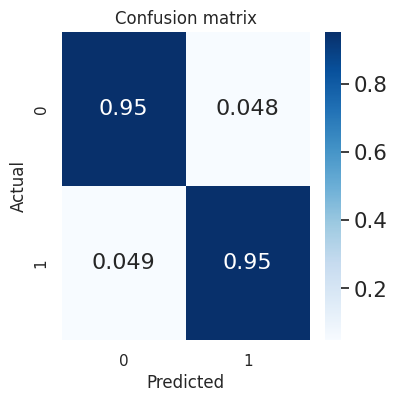

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

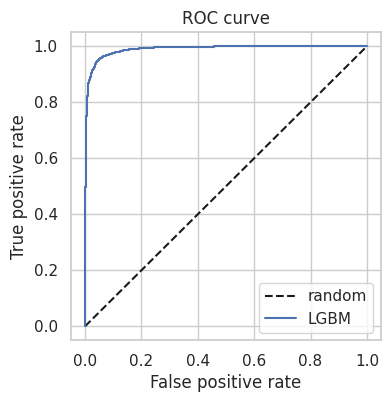

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='LGBM', figsize_w=4, figsize_h=4)

### 6. Categorical Encoding

In [30]:
dataframe=df.copy()

In [31]:
dataframe.columns

Index(['airline', 'customer_review', 'traveller_type', 'cabin', 'seat_comfort',
       'cabin_service', 'food_bev', 'entertainment', 'ground_service',
       'value_for_money', 'recommended'],
      dtype='object')

In [32]:
dataframe=dataframe.drop(['airline','customer_review'],axis=1)  # removing airline for bias and customer review because of textual nature

In [33]:
dataframe['traveller_type'].value_counts()

traveller_type
Solo Leisure      8452
Couple Leisure    5791
Family Leisure    4335
Business          4235
Name: count, dtype: int64

In [42]:
# Define one-hot encoder
onehot_encoder = OneHotEncoder(drop='first')  # Drop first to avoid multicollinearity

# Fit and transform
onehot_encoded = onehot_encoder.fit_transform(dataframe[['traveller_type']])

# Convert to DataFrame with feature names
onehot_feature_names = onehot_encoder.get_feature_names_out(['traveller_type'])
df_onehot_encoded = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_feature_names)

In [44]:
df_onehot_encoded=df_onehot_encoded.astype({'traveller_type_Couple Leisure':'int64',
       'traveller_type_Family Leisure':'int64', 'traveller_type_Solo Leisure':'int64'})

In [53]:
# # Define one-hot encoder
# onehot_encoder = OneHotEncoder() # for segregation of bias and dropped column coefficient

# # Fit and transform
# onehot_encoded = onehot_encoder.fit_transform(dataframe[['traveller_type']])

# # Convert to DataFrame with feature names
# onehot_feature_names = onehot_encoder.get_feature_names_out(['traveller_type'])
# df_onehot_encoded = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_feature_names)

In [46]:
# df_onehot_encoded=df_onehot_encoded.astype({'traveller_type_Business':'int64', 'traveller_type_Couple Leisure':'int64',
#        'traveller_type_Family Leisure':'int64', 'traveller_type_Solo Leisure':'int64'})

In [47]:
dataframe['cabin'].value_counts()

cabin
Economy Class      16376
Business Class      4544
Premium Economy     1194
First Class          699
Name: count, dtype: int64

In [48]:
# Define ordinal encoder with correct categories
ordinal_order = ['Economy Class', 'Premium Economy', 'Business Class', 'First Class']
ordinal_encoder = OrdinalEncoder(categories=[ordinal_order])

# Fit and transform
ordinal_encoded = ordinal_encoder.fit_transform(dataframe[['cabin']])

# Convert to DataFrame with a single feature name
df_ordinal_encoded = pd.DataFrame(ordinal_encoded, columns=['cabin'])

In [49]:
df_ordinal_encoded = df_ordinal_encoded.astype({'cabin':'int64'})

In [50]:
df_ordinal_encoded.value_counts()

cabin
0        16376
2         4544
1         1194
3          699
Name: count, dtype: int64

In [51]:
encoded_df = pd.concat((dataframe.drop(['cabin','traveller_type','recommended'],axis=1),df_onehot_encoded,df_ordinal_encoded,dataframe[['recommended']]),axis=1)

In [52]:
encoded_df

seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0                 4              5         4              4               2   
1                 4              1         1              1               1   
2                 1              4         1              3               1   
3                 4              5         5              5               5   
4                 1              1         1              1               1   
...             ...            ...       ...            ...             ...   
22808             1              1         1              1               1   
22809             1              2         1              1               1   
22810             5              5         5              4               4   
22811             1              1         1              1               1   
22812             1              1         1              3               1   

       value_for_money  traveller_type_Couple Leisure  \
0                    4                              0   
1                    1                              0   
2                    2                              0   
3                    5                              0   
4                    1                              0   
...                ...                            ...   
22808                1                              0   
22809                1                              0   
22810                4                              1   
22811                1                              0   
22812                5                              1   

       traveller_type_Family Leisure  traveller_type_Solo Leisure  cabin  \
0                                  0                            0      0   
1                                  1                            0      0   
2                                  0                            0      0   
3                                  0                            1      0   
4                                  0                            1      0   
...                              ...                          ...    ...   
22808                              1                            0      0   
22809                              1                            0      0   
22810                              0                            0      0   
22811                              0                            1      0   
22812                              0                            0      0   

       recommended  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
22808            0  
22809            0  
22810            1  
22811            0  
22812            0  

[22813 rows x 11 columns]

### 7. Data Splitting

In [42]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [43]:
X=encoded_df.drop('recommended',axis=1)
Y=encoded_df['recommended']

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## ***8. ML Model Implementation***

In [45]:
# Create an empty DataFrame with three columns: 'Column1', 'Column2', 'Column3'
df = pd.DataFrame(columns=['model', 'train_test_set', 'accuracy','precision','recall','F1_score','roc_auc_score'])

In [46]:
# Define scorers for ROC AUC and accuracy
scorers = {
    'accuracy': make_scorer(accuracy_score),
    'roc_auc': make_scorer(roc_auc_score)
}

###  **Parametric Models**

### Linear Models

### Logistic Regression

In [57]:
# Define the pipeline with scaler and logistic regression ()
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', LogisticRegression())  # Logistic regression
])

# Define the parameter grid for hyperparameter tuning
param_grid = {}

# Create GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)


print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {}


In [ ]:
# model
model = 'Log_R'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='Log_R']

model train_test_set accuracy precision recall F1_score roc_auc_score
0  Log_R          train    0.941     0.940  0.939    0.939         0.986
1  Log_R           test    0.945     0.942  0.947    0.944         0.988

In [ ]:
Log_R_report=classification_report(y_test, y_test_pred)
print(Log_R_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2326
           1       0.94      0.95      0.94      2237

    accuracy                           0.95      4563
   macro avg       0.95      0.95      0.95      4563
weighted avg       0.95      0.95      0.95      4563



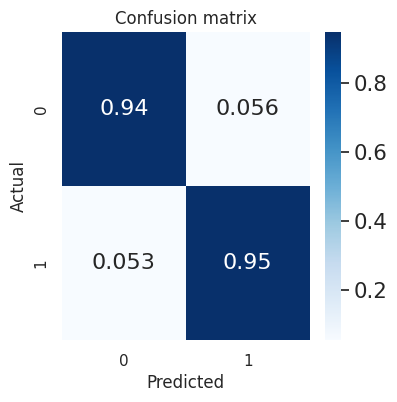

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

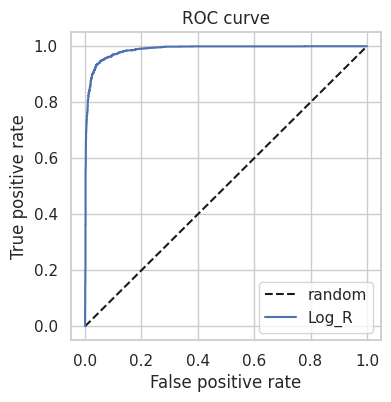

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='Log_R', figsize_w=4, figsize_h=4)

### Support Vector Machine

In [ ]:
# Define the pipeline with feature scaling and SVM classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', SVC(probability=True))  # SVM classifier (to support probability predictions for ROC AUC)
])

# Define the parameter grid for hyperparameter tuning
param_grid = [
    {'classifier__kernel': ['linear'], 'classifier__C': [0.1, 1]},  # Linear kernel
    {'classifier__kernel': ['poly'], 'classifier__degree': [2], 'classifier__C': [0.1, 1]},  # Polynomial kernel (degree 2)
    {'classifier__kernel': ['rbf'], 'classifier__C': [0.1, 1], 'classifier__gamma': ['scale', 'auto']}  # RBF kernel
]

# Create GridSearchCV to tune the hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)


print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


In [ ]:
# model
model = 'SVC'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='SVC']

model train_test_set accuracy precision recall F1_score roc_auc_score
2   SVC          train    0.941     0.943  0.935    0.939         0.986
3   SVC           test    0.946     0.945  0.945    0.945         0.987

In [ ]:
SVC_report=classification_report(y_test, y_test_pred)
print(SVC_report)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2326
           1       0.95      0.95      0.95      2237

    accuracy                           0.95      4563
   macro avg       0.95      0.95      0.95      4563
weighted avg       0.95      0.95      0.95      4563



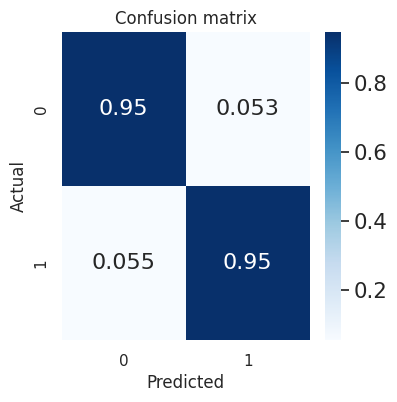

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

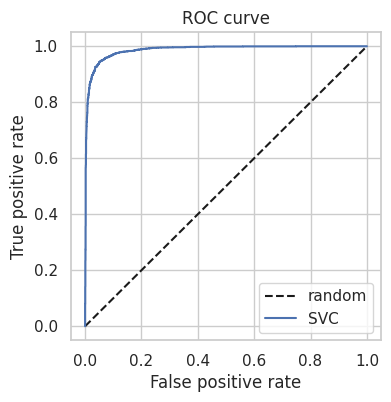

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='SVC', figsize_w=4, figsize_h=4)

### **Non-Parametric Models**

### Naive Bayes

In [ ]:
# Define the pipeline with feature scaling and Gaussian Naive Bayes classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', GaussianNB())  # Gaussian Naive Bayes classifier
])

# No parameter grid for Naive Bayes as it doesn't involve hyperparameters
param_grid = {}

# Create GridSearchCV to fit the model (even if no grid search is needed)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {}


In [ ]:
# model
model = 'Naive_Bayes'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='Naive_Bayes']

model train_test_set accuracy precision recall F1_score roc_auc_score
4  Naive_Bayes          train    0.937     0.939  0.930    0.935         0.984
5  Naive_Bayes           test    0.941     0.941  0.939    0.940         0.986

In [ ]:
Naive_Bayes_report=classification_report(y_test, y_test_pred)
print(Naive_Bayes_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2326
           1       0.94      0.94      0.94      2237

    accuracy                           0.94      4563
   macro avg       0.94      0.94      0.94      4563
weighted avg       0.94      0.94      0.94      4563



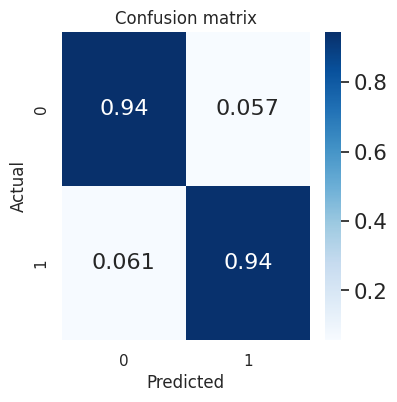

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

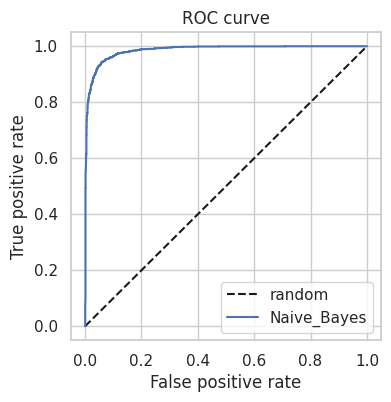

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='Naive_Bayes', figsize_w=4, figsize_h=4)

### KNearestNeighbours

In [ ]:
# Define the pipeline with feature scaling and KNN classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', KNeighborsClassifier())  # KNN classifier
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_neighbors': [5, 7],  # Number of neighbors
    'classifier__weights': ['uniform', 'distance']  # Weighting function
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)


print(f'Best hyperparameters: {grid_search.best_params_}')


Best hyperparameters: {'classifier__n_neighbors': 7, 'classifier__weights': 'uniform'}


In [ ]:
# model
model = 'KNN'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='KNN']

model train_test_set accuracy precision recall F1_score roc_auc_score
6   KNN          train    0.946     0.944  0.945    0.944         0.990
7   KNN           test    0.938     0.931  0.942    0.937         0.979

In [ ]:
KNN_report=classification_report(y_test, y_test_pred)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      2326
           1       0.93      0.94      0.94      2237

    accuracy                           0.94      4563
   macro avg       0.94      0.94      0.94      4563
weighted avg       0.94      0.94      0.94      4563



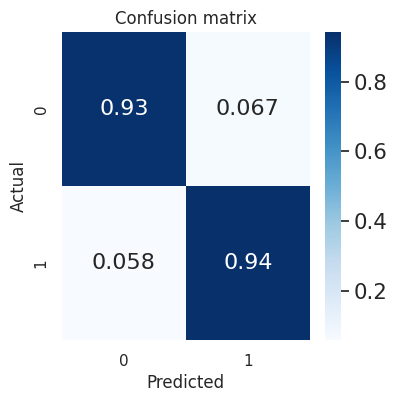

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

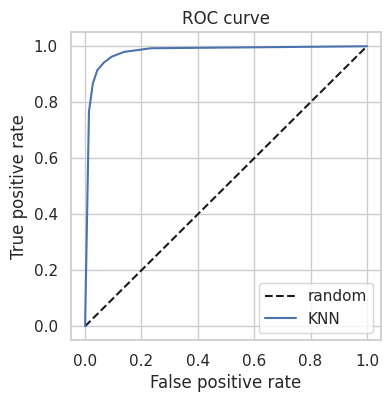

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='KNN', figsize_w=4, figsize_h=4)

### **Tree Based Models**

### Decision Trees

In [ ]:
# Define the pipeline with feature scaling and Decision Tree classifier
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', DecisionTreeClassifier())  # Decision Tree classifier
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],  # Criteria for splitting
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'classifier__max_features': [None, 0.8, 0.6]  # Number of features to consider for the best split
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)


print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__max_features': 0.6, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10}


In [ ]:
# model
model = 'DT_Classifier'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='DT_Classifier']

model train_test_set accuracy precision recall F1_score  \
8  DT_Classifier          train    0.949     0.954  0.941    0.947   
9  DT_Classifier           test    0.932     0.933  0.927    0.930   

  roc_auc_score  
8         0.990  
9         0.967

In [ ]:
DT_Classifier_report=classification_report(y_test, y_test_pred)
print(DT_Classifier_report)

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2326
           1       0.93      0.93      0.93      2237

    accuracy                           0.93      4563
   macro avg       0.93      0.93      0.93      4563
weighted avg       0.93      0.93      0.93      4563



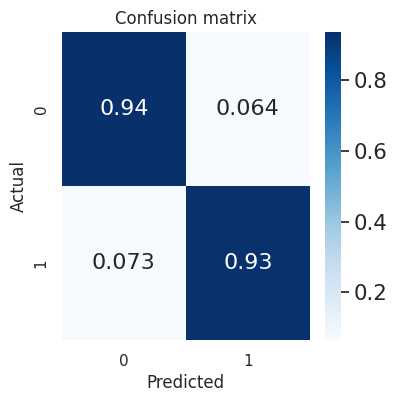

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

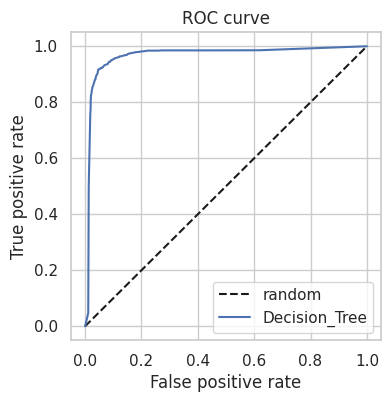

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='Decision_Tree', figsize_w=4, figsize_h=4)

### Ensemble Models

### Random Forest

In [ ]:
# Define the pipeline with feature scaling and Random Forest classifier
pipeline_rf = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', RandomForestClassifier(random_state=42, criterion= 'gini', max_depth= 10, max_features= 0.6, min_samples_leaf= 2, min_samples_split= 10, warm_start=True))  # Random Forest classifier
])

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'classifier__n_estimators': [100, 200],  # Number of trees in the forest
    'classifier__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid_rf, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')

Best hyperparameters: {'classifier__bootstrap': True, 'classifier__n_estimators': 200}


In [ ]:
# model
model = 'RF_Classifier'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='RF_Classifier']

model train_test_set accuracy precision recall F1_score  \
10  RF_Classifier          train    0.953     0.953  0.950    0.952   
11  RF_Classifier           test    0.942     0.941  0.941    0.941   

   roc_auc_score  
10         0.992  
11         0.987

In [ ]:
RF_report=classification_report(y_test, y_test_pred)
print(RF_report)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2326
           1       0.94      0.94      0.94      2237

    accuracy                           0.94      4563
   macro avg       0.94      0.94      0.94      4563
weighted avg       0.94      0.94      0.94      4563



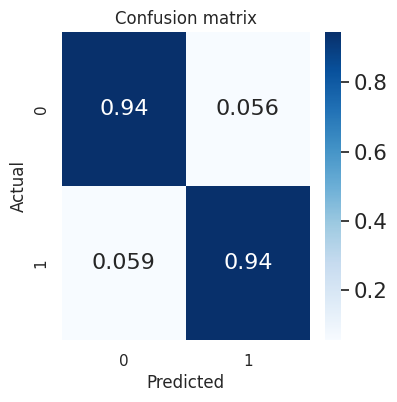

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

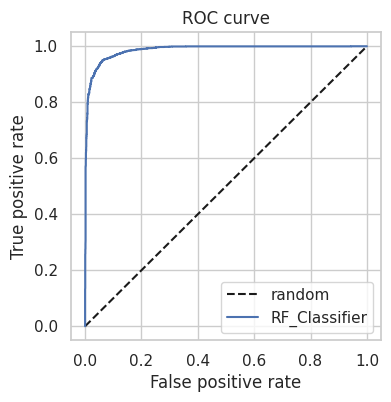

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='RF_Classifier', figsize_w=4, figsize_h=4)

### XGBoost

In [ ]:
# Define the pipeline with scaling and XGBoost classifier
pipeline_xgb = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('classifier', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42,learning_rate= 0.1,subsample = 0.9, max_depth= 10, min_samples_leaf= 2, min_samples_split= 10, warm_start=True))  # XGBoost classifier
])

# Define the parameter grid for hyperparameter tuning
param_grid_xgb = {
    'classifier__n_estimators': [100, 200],  # Number of boosting rounds
    'classifier__colsample_bytree': [0.8, 1.0],  # Fraction of features used per tree
    'classifier__gamma': [ 5,7],  # Minimum loss reduction to make a split
    'classifier__reg_alpha': [1,2],  # L1 regularization term on weights
    'classifier__reg_lambda': [10,12],  # L2 regularization term on weights
}

# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=pipeline_xgb, param_grid=param_grid_xgb, cv=5, scoring=scorers, refit='roc_auc')

# Fit the model
grid_search.fit(X_train, y_train)

print(f'Best hyperparameters: {grid_search.best_params_}')



Best hyperparameters: {'classifier__colsample_bytree': 0.8, 'classifier__gamma': 5, 'classifier__n_estimators': 100, 'classifier__reg_alpha': 2, 'classifier__reg_lambda': 10}


In [ ]:
# model
model = 'XGB_Classifier'

# Predict probabilities on training set
y_train_prob = grid_search.predict_proba(X_train)[:, 1]
y_train_pred = grid_search.predict(X_train)


df.loc[len(df)] = [model, 'train', f"{accuracy_score(y_train, y_train_pred):.3f}",  f"{precision_score(y_train, y_train_pred):.3f}", f"{recall_score(y_train, y_train_pred):.3f}", f"{f1_score(y_train, y_train_pred):.3f}",  f"{roc_auc_score(y_train, y_train_prob):.3f}"]

# Predict on the test set
y_test_prob = grid_search.predict_proba(X_test)[:, 1]
y_test_pred = grid_search.predict(X_test)


df.loc[len(df)] = [model, 'test', f"{accuracy_score(y_test, y_test_pred):.3f}",  f"{precision_score(y_test, y_test_pred):.3f}", f"{recall_score(y_test, y_test_pred):.3f}", f"{f1_score(y_test, y_test_pred):.3f}",  f"{roc_auc_score(y_test, y_test_prob):.3f}"]


In [ ]:
df[df['model']=='XGB_Classifier']

model train_test_set accuracy precision recall F1_score  \
12  XGB_Classifier          train    0.944     0.944  0.940    0.942   
13  XGB_Classifier           test    0.945     0.942  0.945    0.944   

   roc_auc_score  
12         0.987  
13         0.988

In [ ]:
XGB_report=classification_report(y_test, y_test_pred)
print(XGB_report)

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      2326
           1       0.94      0.95      0.94      2237

    accuracy                           0.94      4563
   macro avg       0.94      0.94      0.94      4563
weighted avg       0.94      0.94      0.94      4563



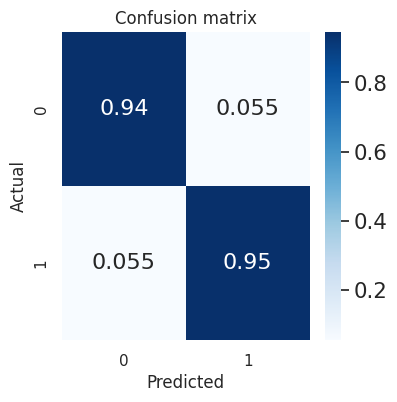

In [ ]:
plot_confusion_matrix(y=y_test, y_pred=y_test_pred, normalize_str='true', figsize_w=4, figsize_h=4)

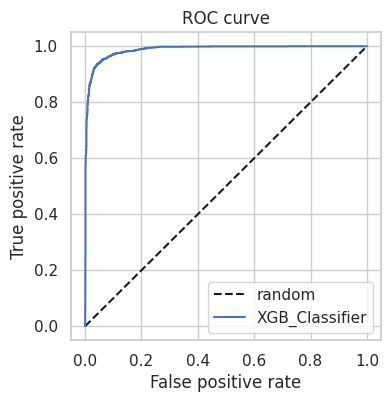

In [ ]:
# True positive rate and false positive rate.
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plot_roc_curve(fpr=fpr, tpr=tpr, clf_name='XGB_Classifier', figsize_w=4, figsize_h=4)

### Model Comparision

In [ ]:
df

model train_test_set accuracy precision recall F1_score  \
0            Log_R          train    0.941     0.940  0.939    0.939   
1            Log_R           test    0.945     0.942  0.947    0.944   
2              SVC          train    0.941     0.943  0.935    0.939   
3              SVC           test    0.946     0.945  0.945    0.945   
4      Naive_Bayes          train    0.937     0.939  0.930    0.935   
5      Naive_Bayes           test    0.941     0.941  0.939    0.940   
6              KNN          train    0.946     0.944  0.945    0.944   
7              KNN           test    0.938     0.931  0.942    0.937   
8    DT_Classifier          train    0.949     0.954  0.941    0.947   
9    DT_Classifier           test    0.932     0.933  0.927    0.930   
10   RF_Classifier          train    0.953     0.953  0.950    0.952   
11   RF_Classifier           test    0.942     0.941  0.941    0.941   
12  XGB_Classifier          train    0.944     0.944  0.940    0.942   
13  XGB_Classifier           test    0.945     0.942  0.945    0.944   

   roc_auc_score  
0          0.986  
1          0.988  
2          0.986  
3          0.987  
4          0.984  
5          0.986  
6          0.990  
7          0.979  
8          0.990  
9          0.967  
10         0.992  
11         0.987  
12         0.987  
13         0.988

In [ ]:
df.to_csv('model_comparision.csv',index=False)

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to go with Precision.

 Precision because I feel False positive are more dangerous than False negatives of recall in this business scenario, as i expect the model to be deployed after user has used airline service, so we will choose to work on customer that had a poor experience with us as the one with good experience will recommend without more promotion or loyalty campaign while the poor experience one might outright shun the airline in their group. Hence False Positives are more harmful here. on the off chance that false negative comes into campaign, it will only increase their loyalty to us more, so no harm there.

### Which ML model did you choose from the above created models as your final prediction model and why?

Model - After comparing all seven models I have reached conclusion to select Logistic Regression because of its stability over train and test sets and simple and interpretable nature. Also because of the cost of training is very low.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.  But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced.
Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

## ***9. Inference***

In [54]:
encoded_df

seat_comfort  cabin_service  food_bev  entertainment  ground_service  \
0                 4              5         4              4               2   
1                 4              1         1              1               1   
2                 1              4         1              3               1   
3                 4              5         5              5               5   
4                 1              1         1              1               1   
...             ...            ...       ...            ...             ...   
22808             1              1         1              1               1   
22809             1              2         1              1               1   
22810             5              5         5              4               4   
22811             1              1         1              1               1   
22812             1              1         1              3               1   

       value_for_money  traveller_type_Couple Leisure  \
0                    4                              0   
1                    1                              0   
2                    2                              0   
3                    5                              0   
4                    1                              0   
...                ...                            ...   
22808                1                              0   
22809                1                              0   
22810                4                              1   
22811                1                              0   
22812                5                              1   

       traveller_type_Family Leisure  traveller_type_Solo Leisure  cabin  \
0                                  0                            0      0   
1                                  1                            0      0   
2                                  0                            0      0   
3                                  0                            1      0   
4                                  0                            1      0   
...                              ...                          ...    ...   
22808                              1                            0      0   
22809                              1                            0      0   
22810                              0                            0      0   
22811                              0                            1      0   
22812                              0                            0      0   

       recommended  
0                1  
1                0  
2                0  
3                1  
4                0  
...            ...  
22808            0  
22809            0  
22810            1  
22811            0  
22812            0  

[22813 rows x 11 columns]

In [55]:
X = encoded_df.drop('recommended',axis=1)
y = encoded_df['recommended']

In [58]:
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)

In [69]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)

In [70]:
model = LogisticRegression()
model.fit(X_scaled,y)

LogisticRegression()

In [71]:
model.intercept_

array([-0.42367732])

In [72]:
model.coef_

array([[ 0.60177839,  0.85227101,  0.57256823,  0.26495829,  1.07399655,
         2.20606376, -0.17067221, -0.11274129,  0.00713084,  0.04536473]])

In [73]:
pd.DataFrame(model.coef_.reshape(1,10),columns=X_scaled.columns).T

0
seat_comfort                   0.601778
cabin_service                  0.852271
food_bev                       0.572568
entertainment                  0.264958
ground_service                 1.073997
value_for_money                2.206064
traveller_type_Couple Leisure -0.170672
traveller_type_Family Leisure -0.112741
traveller_type_Solo Leisure    0.007131
cabin                          0.045365

In [74]:
# Regression Analysis

# Adding a constant for the intercept term
X_stats = sm.add_constant(X_scaled)

# Logistic Regression Model
logit_model = sm.Logit(y, X_stats)

# Fitting the model
result = logit_model.fit()

# Summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.151014
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            recommended   No. Observations:                22813
Model:                          Logit   Df Residuals:                    22802
Method:                           MLE   Df Model:                           10
Date:                Sun, 01 Sep 2024   Pseudo R-squ.:                  0.7820
Time:                        13:37:59   Log-Likelihood:                -3445.1
converged:                       True   LL-Null:                       -15802.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -0.4247      0.033    -12.974      0.

In [99]:
std_coeff=result.params.reset_index().rename(columns={'index':'columns',0:'std_coeff'})

In [111]:
X_std=X.std().reset_index().rename(columns={'index':'columns',0:'std'})

**Being a solo leisure traveller or cabin has a negligible effect on the log-odds of the outcome being 1, as the coefficient is very close to zero and the p-value is high, indicating no significant effect.**

***The coefficient tell the effect of their corresponding variable on log odds Of recommended keeping the remaining variables as constant ***

***Calculating Standardized coefficients using Standardized Coefficient=
(Unstandardized Coefficient * Standard Deviation of Predictor Variable)/Standard Deviation of target***

In [118]:
coeff_df=pd.merge(X_std,std_coeff,on='columns',how='inner')

we have to calculate the unstandardized coefficient

In [139]:
std_y=encoded_df['recommended'].std()

In [142]:
mean_y=encoded_df['recommended'].mean()

In [143]:
coeff_df['unstd_coeff']=(coeff_df['std_coeff']*std_y)/coeff_df['std']

In [144]:
coeff_df

columns       std  std_coeff  unstd_coeff
0                   seat_comfort  1.456394   0.601839     0.206526
1                  cabin_service  1.568847   0.853415     0.271865
2                       food_bev  1.519176   0.572675     0.188397
3                  entertainment  1.507192   0.264755     0.087791
4                 ground_service  1.590456   1.075424     0.337935
5                value_for_money  1.581303   2.212759     0.699348
6  traveller_type_Couple Leisure  0.435220  -0.171502    -0.196940
7  traveller_type_Family Leisure  0.392328  -0.113459    -0.144532
8    traveller_type_Solo Leisure  0.482947   0.006542     0.006770
9                          cabin  0.911280   0.045424     0.024912

In [155]:
std_coeff[std_coeff['columns']=='const']

columns  std_coeff
0   const  -0.424715

For intercept as std is 0 for constant, it uses mean of target
Unstandardized Intercept=(Standardized Intercept * Standard Deviation of Target)+Mean of Target

In [160]:
unstd_intercept = (-0.424715 * std_y) + mean_y
print(unstd_intercept)

0.27237408024427756


1)	Intercept (Constant):
*	Coefficient: 0.2723
*	Odds Ratio: exp(0.2723) ≈ 1.313
*	Probability: ≈0.568
*	Interpretation: When all features are zero, the baseline probability of the outcome being 1 is about 56.8%.

2)	Seat Comfort:
*	Unstandardized Coefficient: 0.2065
*	Odds Ratio: exp(0.2065)≈1.229
*	Probability for a One-Unit Increase: ≈0.558
*	Interpretation: A one-unit increase in seat comfort increases the probability of the outcome being 1 to approximately 55.8%.

3)	Cabin Service:
*	Unstandardized Coefficient: 0.2719
*	Odds Ratio: exp(0.2719)≈1.312
*	Probability for a One-Unit Increase: ≈0.572
*	Interpretation: A one-unit increase in cabin service increases the probability of the outcome being 1 to approximately 57.2%.

4)	Food & Beverage:
*	Unstandardized Coefficient: 0.1884
*	Odds Ratio: exp(0.1884)≈1.207
*	Probability for a One-Unit Increase: ≈0.547
*	Interpretation: A one-unit increase in food and beverage quality raises the probability of the outcome being 1 to approximately 54.7%.

5)	Entertainment:
*	Unstandardized Coefficient: 0.0878
*	Odds Ratio: exp(0.0878)≈1.092
*	Probability for a One-Unit Increase: ≈0.515
*	Interpretation: A one-unit increase in entertainment raises the probability of the outcome being 1 to approximately 51.5%.

6)	Ground Service:
*	Unstandardized Coefficient: 0.3379
*	Odds Ratio: exp(0.3379)≈1.403
*	Probability for a One-Unit Increase: ≈0.578
*	Interpretation: A one-unit increase in ground service raises the probability of the outcome being 1 to approximately 57.8%.

7)	Value for Money:
*	Unstandardized Coefficient: 0.6993
*	Odds Ratio: exp(0.6993)≈2.010
*	Probability for a One-Unit Increase: ≈0.668
*	Interpretation: A one-unit increase in value for money increases the probability of the outcome being 1 to approximately 66.8%.

8)	Traveller Type (Couple Leisure):
*	Unstandardized Coefficient: -0.1969
*	Odds Ratio: exp( -0.1969)≈0.821
*	Probability for Couples on Leisure Travel: ≈0.433
*	Interpretation: Being a couple on leisure travel decreases the probability of the outcome being 1 to approximately 43.3%.

9)	Traveller Type (Family Leisure):
*	Unstandardized Coefficient: -0.1445
*	Odds Ratio: exp( -0.1445)≈0.865
*	Probability for Families on Leisure Travel: ≈0.463
*	Interpretation: Being a family on leisure travel decreases the probability of the outcome being 1 to approximately 46.3%.

10)	Traveller Type (Solo Leisure):
*	Unstandardized Coefficient: 0.0068
*	Odds Ratio: exp(0.0068)≈1.007
*	Probability for Solo Leisure Travel: ≈0.505
*	Interpretation: Being solo on leisure travel has a negligible effect on the probability of the outcome being 1, which remains approximately 50.5%.

11)	Cabin:
*	Unstandardized Coefficient: 0.0249
*	Odds Ratio: exp(0.0249)≈1.025
*	Probability for a One-Unit Increase: ≈0.512
*	Interpretation: A one-unit increase in cabin has a small effect on the probability of the outcome being 1, which increases to approximately 51.2%.

* Significant Positive Effects: Ground service, value for money, cabin service, food & beverage, seat comfort, and entertainment have significant positive effects on the outcome.
* Significant Negative Effects: Traveller types (Couple Leisure and Family Leisure) have significant negative effects.
* Insignificant Effects: Traveller type (Solo Leisure) and cabin have insignificant effects on the outcome.

# **Conclusion**

• Solo Lesisure has the highest value counts, we can conclude that most people who travel by airline travel is solo.37.1% people who travel by airline is solo. Followed by couple and family.

• We can conclude that most of the people around 76.9% people choose economy class to travel by airline. Followed by Business class and others.

• More often people are satisfied by the services provided based on cabin, a detail to take notice is that the spread of Economy in services ranges heavily from all 1 to 5, and most people fly economy. Adding services might be impactful

• We performed Hyperparameter tuning using Grid search CV method, to increase accuracy and avoid Overfitting Criteria.

• We have built classifier models using 7 different types of classifiers and all these are able to give accuracy of more than 90%.We can conclude that Logistic Regression gives the best model.

• Additionally LightGBM model has been trained on textual data and numerical data but the result provided by it are not worth the hassle

• The most important feature are overall rating and Value for money that contribute to a model's prediction whether a passenger will recommended a particular airline to his/her friends.

• In order to increase their business or grow, our client must provide excellent cabin service, ground service, food-beverage entertainment, and seat comfort.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***